<a href="https://colab.research.google.com/github/ShubhPathania/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**            - Shubham Pathania


# **Project Summary -**

**Introduction:**

This project aimed to develop a robust machine learning regression model to forecast bike rental demand in Seoul, South Korea. By understanding the factors influencing bike rentals, the model can help optimize resource allocation and service availability, ultimately improving user experience and overall profit for the bike rental service.

**Methodology:**

The initial phase involved ensuring data quality by checking for duplicates and missing values. The "Date" column was transformed into datetime format, extracting "day" and "month" for further analysis.

1. Exploratory Data Analysis (EDA): Extensive EDA explored various aspects of bike rental demand, including:

- Demand trends over time (hourly, daily, monthly & seasonal).
- Relationship between weather features (temperature, humidity, rainfall, snowfall, solar radiation, dew point temperature etc) and rental bike count.
- Impact of holidays and functional days on demand.

2. Hypothesis Testing: The following hypothesis were tested to validate their influence on demand:

- Higher temperatures lead to increased bike rentals.
- Humidity levels affect bike rentals.
- There's no significant difference in rentals between working days and holidays.

3. Model Development and Evaluation:

- Categorical features were encoded and feature selection techniques like VIF were employed to identify the most relevant predictors for model building.
- Five regression models were implemented and hyperparameter-tuned using Grid Search CV:
  1. Linear Regression
  2. Lasso Regression
  3. Ridge Regression
  4. Random Forest Regression
  5. Gradient Boosting Regression

- Model performance was evaluated using standard regression metrics: Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE) and R-squared (R²) score.

✴ **Random Forest Regression with Grid Searh CV** emerged as the best performing model with **89.5% predictive accuracy**.

In conclusion, a machine learning model was developed capable of predicting bike rental demand. By leveraging weather data, temporal information and other relevant factors, the model can provide valuable insights to optimize the bike-sharing system. Future work may involve:

- Exploring additional features or data sources for further improvement.
- Deploying the model into a production environment for real-time predictions.

# **GitHub Link -**

https://github.com/ShubhPathania/Bike-Sharing-Demand-Prediction

# **Problem Statement**


**Objective:**

Develop a robust regression model to predict the demand for bike rentals in Seoul, South Korea. This model will anticipate the number of bikes rented at specific times, considering various factors that influence rental decisions.

**Features:**

- Temporal data: Date information
- Weather conditions: Temperature, humidity, rainfall, snowfall etc.
- Other relevant factors:
  1. Seasonality
  2. Holidays
  3. Functioning Day

**Evaluation:**

The model's effectiveness will be assessed using standard regression evaluation metrics:

- Mean Squared Error (MSE): Represents the average squared difference between predicted and actual rental values.

- Mean Absolute Error (MAE): Measures the average magnitude of prediction errors.

- Root Mean Squared Error (RMSE): Captures the spread of prediction errors.

- R-squared (R²): Represents the proportion of variance in rental demand explained by the model.

**Potential Impact:**

- An accurate predictive model can significantly improve the efficiency of Seoul's bike rental system. By effectively anticipating demand, resources can be allocated strategically and service availability can be optimized. This can lead to reduced wait times for users, sufficient bikes during peak times, improved user experience, potentially encouraging a wider adoption of bike rentals as a sustainable transportation option.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
try:
  bike_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Projects/Module - 6/Project Datasets/SeoulBikeData.csv", encoding="ISO-8859-1")
  print('Dataset loaded successfully.')
except:
  print("Some Error occured.")

Dataset loaded successfully.


### Dataset First View

In [4]:
# Dataset First Look
df_first_view = pd.concat([bike_df.head(), bike_df.sample(3), bike_df.tail()])
df_first_view

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
1184  19/01/2018                648     8             -2.5           50   
4651  12/06/2018               2873    19             23.1           58   
8058  01/11/2018               2254    18             11.8           43   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
1184               1.0              1281                      -11.5   
4651               2.4              1997                       14.3   
8058               1.3              1995                       -0.3   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                        0.00           0.0            0.0  Winter   
1                        0.00           0.0            0.0  Winter   
2                        0.00           0.0            0.0  Winter   
3                        0.00           0.0            0.0  Winter   
4                        0.00           0.0            0.0  Winter   
1184                     0.00           0.0            0.0  Winter   
4651                     0.59           0.0            0.0  Summer   
8058                     0.03           0.0            0.0  Autumn   
8755                     0.00           0.0            0.0  Autumn   
8756                     0.00           0.0            0.0  Autumn   
8757                     0.00           0.0            0.0  Autumn   
8758                     0.00           0.0            0.0  Autumn   
8759                     0.00           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
1184  No Holiday             Yes  
4651  No Holiday             Yes  
8058  No Holiday             Yes  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
num_rows, num_columns = bike_df.shape

print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

Number of Rows: 8760
Number of Columns: 14


### Dataset Information

In [6]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
bike_df.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Axes: >

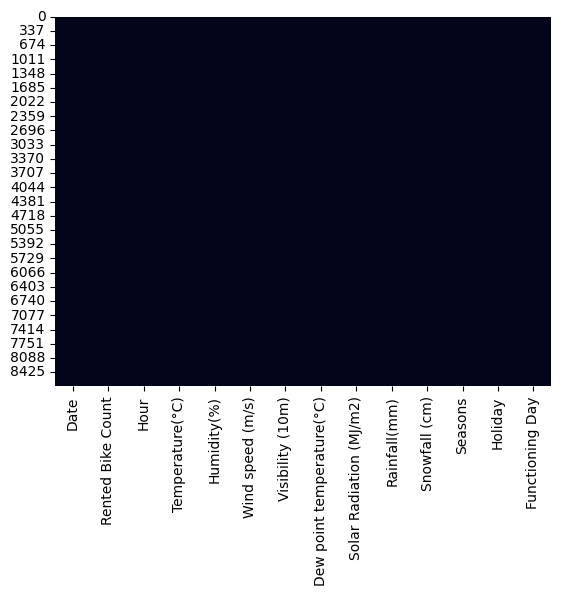

In [9]:
# Visualizing the missing values
sns.heatmap(bike_df.isnull(), cbar= False)

In [10]:
# Summary of Dataset
def dataset_info():
  col = pd.DataFrame(index = bike_df.columns)
  col["data_type"] = bike_df.dtypes
  col["duplicate_count"] = bike_df.duplicated().sum()
  col["count_of_non_null_values"] = bike_df.count()
  col["Missing/Null_values"] = bike_df.isnull().sum()

  return col

print("\t\t\t\t\t\033[1mSummary of Dataset\033[0m\n")
dataset_info()

					Summary of Dataset



data_type  duplicate_count  \
Date                         object                0   
Rented Bike Count             int64                0   
Hour                          int64                0   
Temperature(°C)             float64                0   
Humidity(%)                   int64                0   
Wind speed (m/s)            float64                0   
Visibility (10m)              int64                0   
Dew point temperature(°C)   float64                0   
Solar Radiation (MJ/m2)     float64                0   
Rainfall(mm)                float64                0   
Snowfall (cm)               float64                0   
Seasons                      object                0   
Holiday                      object                0   
Functioning Day              object                0   

                           count_of_non_null_values  Missing/Null_values  
Date                                           8760                    0  
Rented Bike Count                              8760                    0  
Hour                                           8760                    0  
Temperature(°C)                                8760                    0  
Humidity(%)                                    8760                    0  
Wind speed (m/s)                               8760                    0  
Visibility (10m)                               8760                    0  
Dew point temperature(°C)                      8760                    0  
Solar Radiation (MJ/m2)                        8760                    0  
Rainfall(mm)                                   8760                    0  
Snowfall (cm)                                  8760                    0  
Seasons                                        8760                    0  
Holiday                                        8760                    0  
Functioning Day                                8760                    0

### What did you know about your dataset?

From the data exploration we have done so far, we have identified the following important characteristics:

**1. General Information:** The dataset has 8760 rows and 14 columns.

**2. Column Information:** Most of the columns are in the correct datatype, but the Date column appears to be of object type, which might need to be converted to datetime. These columns show an indirect relation with bike demands over time, including different weather conditions.

**3. Duplicate Values:** No duplicate rows were observed in the dataset.

**4. Missing Values:** There were no missing/null values.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Describe
bike_df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [12]:
# Dataset Columns
pd.DataFrame(bike_df.columns, columns = ["Variables of Dataset"])

Variables of Dataset
0                        Date
1           Rented Bike Count
2                        Hour
3             Temperature(°C)
4                 Humidity(%)
5            Wind speed (m/s)
6            Visibility (10m)
7   Dew point temperature(°C)
8     Solar Radiation (MJ/m2)
9                Rainfall(mm)
10              Snowfall (cm)
11                    Seasons
12                    Holiday
13            Functioning Day

### Variables Description

The dataset has 14 columns and are identified as below:

1. **Date:** The column specifies the date of observation.
2. **Rented Bike Count:** The column specifies the total number of bikes rented at the time of observation.
3. **Hour:** The column specifies the hour of the day.
4. **Temperature(°C):** The column specifies the temperature in celcius at the time of observation.
5. **Humidity(%):** The column specifies the relative humidity in percentage at the time of observation.
6. **Wind speed (m/s):** The column specifies the wind speed in meter per second at the time of observation.
7. **Visibility (10m):** The column specifies the visibilty in meter at the time of observation.
8. **Dew point temperature(°C):** The column specifies the dew point temperatue in celcius at the time of observation.
9.	**Solar Radiation (MJ/m2):** The column specifies the solar radiation in mega-joules per square meter at the time of observation.
10.	**Rainfall(mm):** The column specifies the rainfall in millimeters at the time of observation.
11.	**Snowfall (cm):** The column specifies the snowfall in centimeters at the time of observation.
12.	**Seasons:** The column specifies the season of the year during data was recorded
13.	**Holiday:** The column specifies whether it was holiday when the data was recorded, (binary column: Yes/No).
14.	**Functioning Day:** The column specifies whether it was a functioning or operational day for company when the data was recorded, (binary column: Yes/No).

### Check Unique Values for each variable.

In [13]:
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [14]:
# Check Unique Values for each variable.
variable_list = list(bike_df.columns)

def check_unique_values(variable):
  unique_values = bike_df[variable].unique()
  return unique_values

In [15]:
pd.DataFrame(check_unique_values(variable_list[11]), columns = ["Unique Seasons"])

Unique Seasons
0         Winter
1         Spring
2         Summer
3         Autumn

In [16]:
pd.DataFrame(check_unique_values(variable_list[12]), columns = ["Unique Holiday"])

Unique Holiday
0     No Holiday
1        Holiday

In [17]:
pd.DataFrame(check_unique_values(variable_list[11]), columns = ["Unique Functioning Day"])

Unique Functioning Day
0                 Winter
1                 Spring
2                 Summer
3                 Autumn

## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Convert Date column to datetime datatype
bike_df["Date"] = pd.to_datetime(bike_df["Date"], dayfirst= True)

# Extract day and month from Date column
bike_df["Day"] = bike_df["Date"].dt.day_name()
bike_df["Month"] = bike_df["Date"].dt.month

In [19]:
bike_df.sample(3)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
6137 2018-08-13               1358    17             33.2           55   
5558 2018-07-20                741    14             33.4           52   
5127 2018-07-02                619    15             24.2           93   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
6137               2.7              1600                       22.9   
5558               2.7               685                       22.1   
5127               1.0               590                       22.9   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
6137                     0.55           0.0            0.0  Summer   
5558                     2.67           0.0            0.0  Summer   
5127                     0.78           0.0            0.0  Summer   

         Holiday Functioning Day     Day  Month  
6137  No Holiday             Yes  Monday      8  
5558  No Holiday             Yes  Friday      7  
5127  No Holiday             Yes  Monday      7

### Data Analysis

**1. Rented Bike Demand Over Time**

In [20]:
daily_rental_count = bike_df.groupby("Date")["Rented Bike Count"].sum()
daily_rental_count

Date
2017-12-01     9539
2017-12-02     8523
2017-12-03     7222
2017-12-04     8729
2017-12-05     8307
              ...  
2018-11-26    17162
2018-11-27    16282
2018-11-28    16524
2018-11-29    16423
2018-11-30    16297
Name: Rented Bike Count, Length: 365, dtype: int64

**2. Seasonal Analysis**

In [21]:
seasonal_count = bike_df.groupby("Seasons")["Rented Bike Count"].sum()
seasonal_count

Seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: Rented Bike Count, dtype: int64

**3. Hourly Demand on an Average**

In [22]:
hourly_count = bike_df.groupby("Hour")["Rented Bike Count"].mean()
hourly_count

Hour
0      541.460274
1      426.183562
2      301.630137
3      203.331507
4      132.591781
5      139.082192
6      287.564384
7      606.005479
8     1015.701370
9      645.983562
10     527.821918
11     600.852055
12     699.441096
13     733.246575
14     758.824658
15     829.186301
16     930.621918
17    1138.509589
18    1502.926027
19    1195.147945
20    1068.964384
21    1031.449315
22     922.797260
23     671.126027
Name: Rented Bike Count, dtype: float64

**4. Holiday vs. Non Holiday**

In [23]:
holiday_count = bike_df.groupby("Holiday")["Rented Bike Count"].sum()
holiday_count

Holiday
Holiday        215895
No Holiday    5956419
Name: Rented Bike Count, dtype: int64

**5. Functional Day Anlaysis**

In [24]:
functioning_day_count = bike_df.groupby("Functioning Day")["Rented Bike Count"].sum()
functioning_day_count

Functioning Day
No           0
Yes    6172314
Name: Rented Bike Count, dtype: int64

**6. Correlation Analysis**

In [25]:
columns = ["Rented Bike Count", "Hour", "Temperature(°C)", "Humidity(%)", "Wind speed (m/s)", \
           "Visibility (10m)", "Dew point temperature(°C)", "Solar Radiation (MJ/m2)", "Rainfall(mm)", \
           "Snowfall (cm)", "Month"]

correlation_matrix = bike_df[columns].corr()
print(correlation_matrix)

                           Rented Bike Count          Hour  Temperature(°C)  \
Rented Bike Count                   1.000000  4.102573e-01         0.538558   
Hour                                0.410257  1.000000e+00         0.124114   
Temperature(°C)                     0.538558  1.241145e-01         1.000000   
Humidity(%)                        -0.199780 -2.416438e-01         0.159371   
Wind speed (m/s)                    0.121108  2.851967e-01        -0.036252   
Visibility (10m)                    0.199280  9.875348e-02         0.034794   
Dew point temperature(°C)           0.379788  3.054372e-03         0.912798   
Solar Radiation (MJ/m2)             0.261837  1.451309e-01         0.353505   
Rainfall(mm)                       -0.123074  8.714642e-03         0.050282   
Snowfall (cm)                      -0.141804 -2.151645e-02        -0.218405   
Month                               0.133514  1.749134e-15         0.216183   

                           Humidity(%)  Wind speed 

### What all manipulations have you done and insights you found?

The detailed overview of all the manipulations done so far is as follows as:

- The Date column was originally in an object datatype, so it was necessary to convert it into a Datetime datatype for date-related analysis.

- Two new columns (Day, Month) were extracted from the Date column to capture more nuances in the analysis.

Later, data analysis was performed on some important aspects of the dataset:

1. Rental Bike Demand Over Time: A series showing the demand of rented bikes over time from 2017-12-01 to 2018-11-30.

2. Seasonal Analysis: A series with four seasons: Autumn, Spring, Summer and Winter, showing the demand of rented bikes throughout these seasons.

3. Average Hourly Demand: A series showing avergae demand of rented bikes at different times of the day.

4. Functional Day Analysis: The total count of rented bikes on functional or no-functional days.

5. Correlation Analysis: Correlation of rented bikes against different weather conditions and temporal features.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart - 1 (Rented Bike Demand Over Time)**

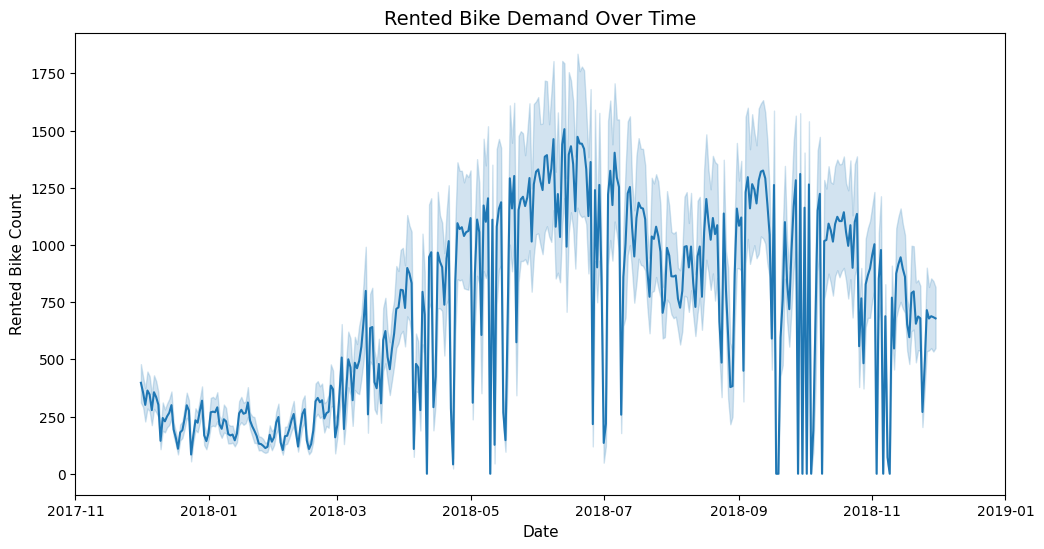

In [26]:
# Plot the data
plt.figure(figsize= (12, 6))
sns.lineplot(data= bike_df, x="Date", y="Rented Bike Count")

# Set chart title and axis labels
plt.title("Rented Bike Demand Over Time", size= 14)
plt.xlabel("Date", size= 11)
plt.ylabel("Rented Bike Count", size= 11)

# Set the x-axis limits
plt.xlim(pd.Timestamp('2017-11'), pd.Timestamp('2019-01'))

plt.show()

##### 1. Why did you pick the specific chart?

A line plot was chosen for this visualization because it effectively shows the trend of rented bikes count over the years. A line plot is suitable for showing the progression of a numeric variable (Rented Bike Count) across a continuous axis (years).

##### 2. What is/are the insight(s) found from the chart?

Several insights are drawn from the chart, as follows:

1. Constant Demand in 2017: The year 2017 showed a consistent but not very promising trend in rented bike demand. This could be because the company might have just started their business at that time.

2. Fluctuating Demand in 2018: The trend changed significantly after 2017. There was a huge demand for rented bikes in the middle and end of 2018. However, there were also a few months with a significant drop (close to 0) in demand. This suggests that certain factors or reasons might be influencing the demand.

##### 3. Will the gained insights help creating a positive business impact?


These insights can potentially create a positive business impact in the following ways:

1. Identification of High and Low Demand Periods: Understanding periods of high demand can help the company focus on promotional activities and inventory management during these times. Whereas, also knowing low demand periods allowing the company to investigate potential issues and adjust strategies accordingly.

2. Strategic Adjustments: The company can optimize operations and marketing efforts based on demand patterns. This can include targeted promotions, better inventory planning and improved resource allocation.

Are there any insights that lead to negative growth? Justify with specific reason.

However, there are also some potential negative implications of the insights that need to be addressed:

- The insights highlight periods with significant drops in demand, which could lead to negative growth if not addressed. Potential reasons for these drops might include seasonal variations, weather conditions, competition or operational issues.  Addressing these issues efficiently can help avoid negative impacts on growth.

#### **Chart - 2 (Rented Bike Demand During Different Seasons)**

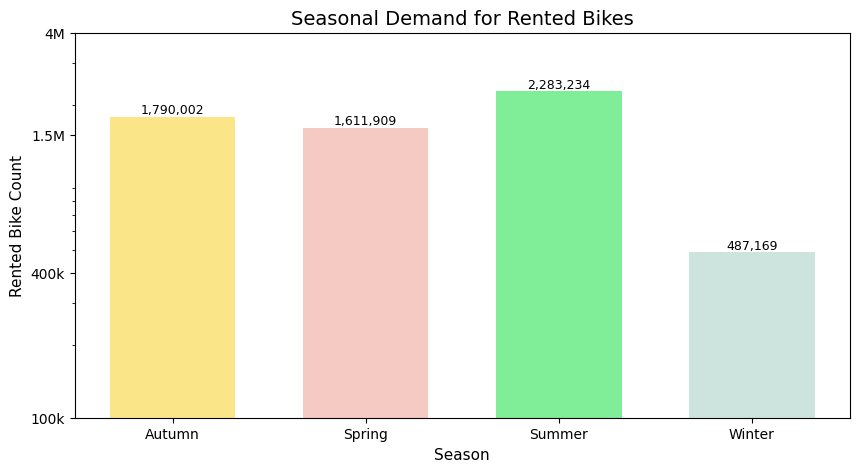

In [27]:
# Define color for the chart
colors = ['#fae588', '#f5cac3', '#80ed99',  '#cce3de']

# Plot the bar chart
plt.figure(figsize= (10, 5))
bars = plt.bar(seasonal_count.index, seasonal_count.values, width= 0.65, color= colors)

# Set chart title and axis labels
plt.title("Seasonal Demand for Rented Bikes", size= 14)
plt.xlabel("Season", size= 11)
plt.ylabel("Rented Bike Count", size= 11)

# Custom y-ticks range
plt.yscale('log')
plt.yticks(ticks=[10**5, 4*10**5, 1.5*10**6, 4*10**6],
           labels=['100k', '400k', '1.5M', '4M'])

# Add annotations for each bar with the corresponding number of bike counts
for bar, value in zip(bars, seasonal_count.values):
  plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:,}',
             size= 9, ha='center', va='bottom')

plt.show()

##### 1. Why did you pick the specific chart?

A bar chart was chosen for this visualization because it is effective in visually representing categorical data (seasons) and associated quantitative values (bike counts). Each season is represented by a bar and height of each bar is corresponding to count of rented bikes.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart of seasonal demand for rented bikes are as follows:

1. Seasonal Demand Variation: Summer exhibits the highest demand for bikes, followed by Autumn and Spring. This trend suggests that favorable weather conditions during these seasons likely contribute to increased outdoor activities and bike rentals.

2. Low Demand in Winter: The chart shows the lowest demand during the Winter season. This can be attributed to less favorable weather conditions such as cold temperatures, which typically discourage outdoor activities like biking.

##### 3. Will the gained insights help creating a positive business impact?


These insights can potentially create a positive business impact in the following ways:

1. Optimized Resource Allocation: By understanding seasonal demand patterns, the business can allocate resources more efficiently. For example, they can adjust inventory levels and staffing during peak seasons like Summer, Autumn, and Spring to meet increased demand.


Are there any insights that lead to negative growth? Justify with specific reason.


Yes, there are also some potential negative implications of the insights that need to be addressed:

- The low demand observed during Winter could negatively impact revenue if the business does not implement strategies to mitigate this seasonal downturn. For example company can provide winter gears for safety and adverse weather conditions.

#### **Chart - 3 (Hourly Demand on an Average)**

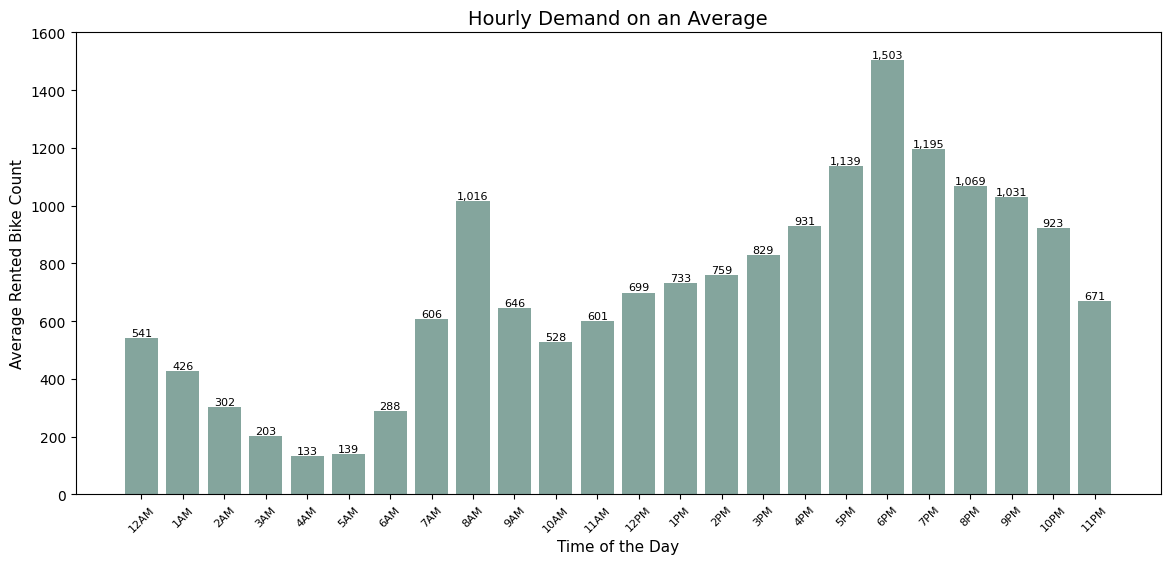

In [28]:
# Plot the bar chart
plt.figure(figsize= (14, 6))
bars = plt.bar(hourly_count.index, hourly_count, color='#84a59d')

# Set chart title and axis labels
plt.title("Hourly Demand on an Average", size= 14)
plt.xlabel("Time of the Day", size= 11)
plt.ylabel("Average Rented Bike Count", size= 11)

# Custom y-axis limit and x-axis labels
plt.ylim(0, 1600)
plt.xticks(hourly_count.index,
        labels = [f'{hour % 12 if hour % 12 != 0 else 12}{"AM" if hour < 12 else "PM"}'
           for hour in range(24)], size= 8, rotation= 45
  )
# Add annotations for each bar with the corresponding number of bike counts
for bar, value in zip(bars, hourly_count):
  plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:,.0f}',
             size= 8, ha='center', va='bottom')

plt.show()

##### 1. Why did you pick the specific chart?

The bar graph was chosen because it is well-suited for displaying categorical data in a straightforward and visually intuitive manner. By displaying each hour as a separate bar, the chart allows for easily visual comparison of bike rental counts throughout different time of the day. This clarity makes it easy to identify peak hours of bike usage.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart of hourly demand for rented bikes are as follows:

1. The chart shows a notable peak in bike rental demand during the morning hours, specifically from 7 to 9 AM. This suggests a high demand from people who are likely using bikes for their daily routine to work or other morning activities.

2. There is a significant surge in demand observed in the evening hours, particularly from 5 to 7 PM. This peak indicates that bikes are also popular for returning back home from work or for evening activities.

3. During the hours between 10 AM and 5 PM, there is a general upward trend in bike rental demand. This could suggest a steady usage pattern throughout the day, potentially for leisure activities, short trips etc.

##### 3. Will the gained insights help creating a positive business impact?


These insights can potentially create a positive impact on the bike rental business:

1. Optimized Resource Allocation: Understanding the peak hours (morning and evening) allows the business to optimize bike inventory. They can ensure sufficient bikes are available during peak times to meet customer demand, thereby enhancing customer satisfaction and retention.

2. Targeted Marketing and Promotions: With knowledge of peak hours, the business can implement targeted marketing campaigns and promotions. For example, offering discounts or incentives during off-peak hours to encourage more consistent bike usage throughout the day.

Are there any insights that lead to negative growth? Justify with specific reason.


- Since the chart itself does not reflect any insights that might lead to negative growth, but bike rental service company need to have sufficient bikes in the peak hours (observed in the chart) to meet customer satisfaction.

#### **Chart - 4 (Relationship between Weather Features and Rented Bike Count)**

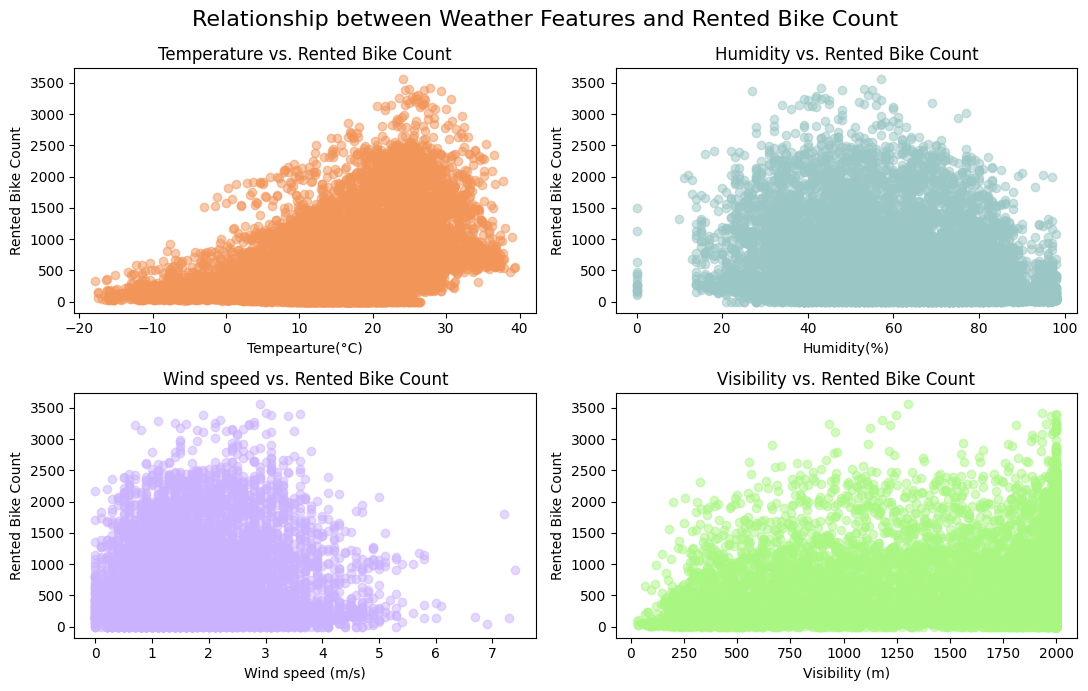

In [29]:
# Setting figure size and title for the plot
plt.figure(figsize= (11, 7))
plt.suptitle("Relationship between Weather Features and Rented Bike Count", size= 16)

# Plot 1. Temperature vs. Rented Bike Count
plt.subplot(2, 2, 1)
plt.scatter(bike_df["Temperature(°C)"], bike_df["Rented Bike Count"], color = "#f29559", alpha= 0.5)
plt.title("Temperature vs. Rented Bike Count", size= 12)
plt.xlabel("Tempearture(°C)", size= 10)
plt.ylabel("Rented Bike Count", size= 10)

# Plot 2. Humidity vs. Rented Bike Count
plt.subplot(2, 2, 2)
plt.scatter(bike_df["Humidity(%)"], bike_df["Rented Bike Count"], color = "#9ac6c5", alpha= 0.5)
plt.title("Humidity vs. Rented Bike Count", size= 12)
plt.xlabel("Humidity(%)", size= 10)
plt.ylabel("Rented Bike Count", size= 10)

# Plot 3. Wind speed vs. Rented Bike Count
plt.subplot(2, 2, 3)
plt.scatter(bike_df["Wind speed (m/s)"], bike_df["Rented Bike Count"], color = "#cbb2fe", alpha= 0.5)
plt.title("Wind speed vs. Rented Bike Count", size= 12)
plt.xlabel("Wind speed (m/s)", size= 10)
plt.ylabel("Rented Bike Count", size= 10)

# Plot 4. Visibility vs. Rented Bike Count
plt.subplot(2, 2, 4)
plt.scatter(bike_df["Visibility (10m)"], bike_df["Rented Bike Count"], color = "#aaf683", alpha= 0.5)
plt.title("Visibility vs. Rented Bike Count", size= 12)
plt.xlabel("Visibility (m)", size= 10)
plt.ylabel("Rented Bike Count", size= 10)
plt.tight_layout()

plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots were chosen for this visualization because it directly shows the relationship between weather features (Temperature, Humidity, Wind Speed & Visibility) and rented bike count. Scatter plots are ideal for visualizing the patterns, outliers and the trend associated with data.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart are as follows:

1. The first plot between temperature and rented bike counts represents a left-skewed distribution, showing that most data points are clustered in the temperature range of 25 to 30°C. This suggests that bike rentals are more frequent when the temperature is in this moderate range or a bit a higher.

2. The second plot between humidity and rented bike counts represents a normal distribution, showing that most data points are clustered in the humidity range of 20 to 80%. This suggests that bike rentals are relatively stable across a wide range of humidity levels, with peak rentals occurring in moderate humidity.

3. The third plot between wind speed and rented bike counts represents a right-skewed distribution, showing that most data points are clustered in the wind speed range of 0 to 4 m/s. This suggests that lower wind speeds are more favorable for bike rentals, as higher wind speeds might restrict people from renting bikes.

4. The fourth plot between visibility and rented bike counts represents a left-skewed distribution, suggesting that days with higher visibility tend to have a higher number of rented bikes.

##### 3. Will the gained insights help creating a positive business impact?


The gained insights can help create a positive business impact by:

1. By understanding that bike rentals are higher in the temperature range of 25 to 30°C and during days with higher visibility, the company can target marketing and promotional efforts during these favorable conditions to maximize rentals.

2. Knowing that bike rentals are stable across moderate humidity levels and low wind speeds, the company can optimize bike availability to ensure a sufficient number of bikes are ready for rental during these conditions

Are there any insights that lead to negative growth? Justify with specific reason.


There are also some potential negative implications of the insights that need to be addressed:

The right-skewed distribution for wind speed indicates that higher wind speeds might affect bike rentals. Similarly, extreme temperatures outside the comfortable range of 25 to 30°C could reduce rentals.

#### **Chart - 5 (Holiday vs. Regular Day)**

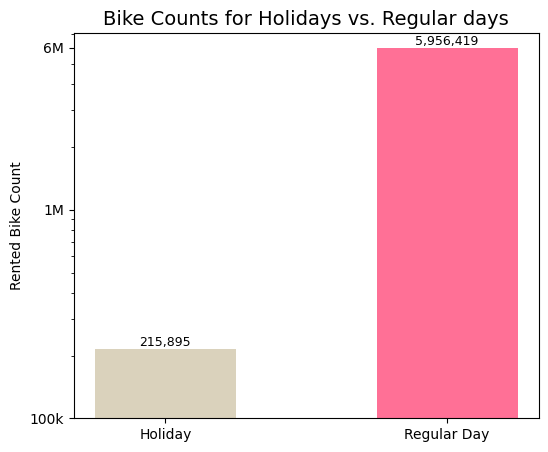

In [30]:
# Define color for the chart
colors = ["#dad2bc", "#ff7096"]

# Plot the bar chart
plt.figure(figsize= (6, 5))
bars = plt.bar(holiday_count.index, holiday_count, width= 0.5, color= colors)

# Set chart title and axis labels
plt.title("Bike Counts for Holidays vs. Regular days", size= 14)
plt.xlabel("")
plt.ylabel("Rented Bike Count", size= 10)

# Custom x-axis labels and y-axis range
plt.xticks([0, 1], ['Holiday', 'Regular Day'])
plt.yscale('log')
plt.yticks(ticks= [1e5, 1e6,  6e6], labels= ['100k', '1M', '6M'])

# Add annotations for each bar with the corresponding number of bike counts
for bar, value in zip(bars, holiday_count):
  plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:,}',
             size= 9, ha='center', va='bottom')

plt.show()

##### 1. Why did you pick the specific chart?

A bar chart was chosen for this visualization because it effectively represents categorical data (Holiday) and associated quantitative values (bike counts). The bars corresponding to the count of rented bikes allow for easy visualization and comparison of the results.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart are as follows:

1. The number of rented bikes on non-holidays (regular days) is significantly higher than on holidays, which indicates that people are more likely to rent bikes for daily commuting or regular activities during workdays.

2. The lower demand for rented bikes on holidays indicates that fewer people opt for bike rentals during holidays compared to regular days, the reason could be whether they prefer to stay at home or they have other transportation preferences like personal or public vehicles.

##### 3. Will the gained insights help creating a positive business impact?

The gained insights can help create a positive business impact by:

- Understanding the higher demand for rented bikes on regular days compared to holidays allows the business to optimize staffing and bike availability accordingly. This insight enables targeted marketing and promotional strategies to attract more customers on holidays and maintain service efficiency on regular days.

Are there any insights that lead to negative growth? Justify with specific reason.

- The lower demand for rented bikes on holidays could potentially lead to negative growth if not addressed. Implementing targeted marketing tactics such as free rides for handful of lucky customers and discount offers would be essential to incentivize customers to choose bike rentals during holidays.

#### **Chart - 6 (Functional Day Anlaysis)**

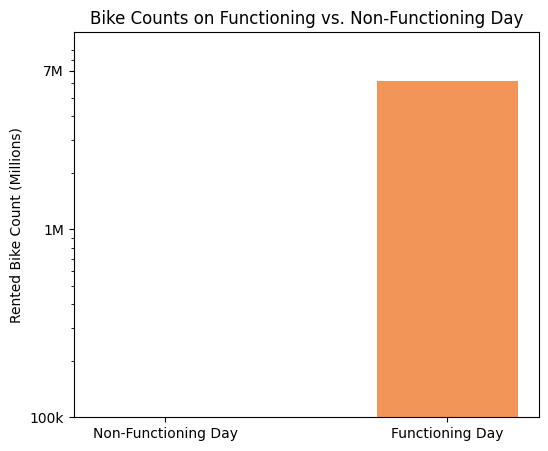

In [31]:
# Define color for the chart
colors = ["#b8b08d", "#f29559"]

# Plot the bar chart
plt.figure(figsize= (6, 5))
plt.bar(functioning_day_count.index, functioning_day_count, width= 0.5, color= colors)

# Set chart title and axis labels
plt.title("Bike Counts on Functioning vs. Non-Functioning Day", size= 12)
plt.xlabel("")
plt.ylabel("Rented Bike Count (Millions)", size= 10)

# Custom x-axis labels and y-ticks range
plt.xticks([0, 1], ['Non-Functioning Day', 'Functioning Day'])
plt.yscale('log')
plt.yticks(ticks=[1e5, 1e6,  7e6], labels=['100k', '1M', '7M'])

plt.show()

##### 1. Why did you pick the specific chart?

A bar chart was chosen for this visualization because it effectively represents categorical data (Functioning day) and associated quantitative values (bike counts). The bars corresponding to the count of rented bikes allow for easy visualization and comparison of the results.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart are as follows:

- The chart shows that 6,172,314 bikes were rented on functional (operational) days, indicating a robust demand for bike rentals during operational days. The absence of non-functional days suggests that the company did not shut down operations on any day during the observed period.

##### 3. Will the gained insights help creating a positive business impact?


The gained insights can help create a positive business impact by:

- Knowing that there were no non-functional days suggests a consistent service availability, which is likely to build customer trust and satisfaction. This consistency can lead to repeat customers and positive impact on business.

Are there any insights that lead to negative growth? Justify with specific reason.

- Since the chart itself does not reflect any insights that might lead to negative growth, but it needs to be consider that if the company's operational days do not align with customer needs (e.g., closures on peak demand days or non-availability of bikes), it could affect business revenue and lead to negative customer experiences.

#### **Chart - 7 (Relationship between Temperature and Humidity)**

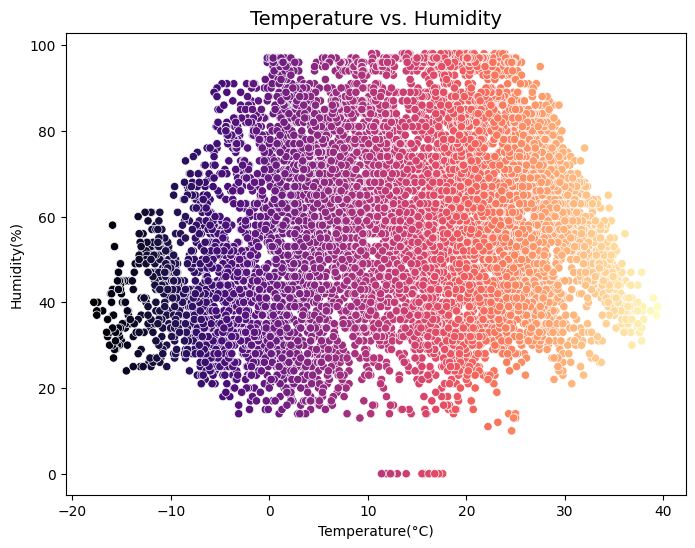

In [32]:
# Plot the chart
plt.figure(figsize= (8, 6))
sns.scatterplot(data=bike_df, x="Temperature(°C)", y="Humidity(%)", hue="Temperature(°C)", palette= "magma")

# Set title and axis labels
plt.title("Temperature vs. Humidity", size= 14)
plt.xlabel("Temperature(°C)", size= 10)
plt.ylabel("Humidity(%)", size= 10)
plt.legend().remove()

plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot was chosen for this visualization because it directly shows the relationship between weather features (i.e temperature & humidity). Scatter plots are ideal for visualizing the patterns, outliers and the trend associated with data.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart are as follows:

- The concentration of data points around moderate temperature and humidity levels suggests that the dataset reflects typical weather conditions where neither extremely hot nor extremely humid conditions are prevalent. This could imply that the bike rental business may not face as many operational challenges related to weather extremes, potentially leading to smoother operations throughout most weather conditions.


##### 3. Will the gained insights help creating a positive business impact?


- Operational Stability: The business can anticipate stable demand and operational patterns, which can facilitate better resource allocation and planning.

- Customer Satisfaction: Moderate weather conditions are generally favorable for biking, ensuring a good experience for customers, which can enhance customer satisfaction and retention.

Are there any insights that lead to negative growth? Justify with specific reason.

However, the chart itself does not reflect any insights that might lead to negative growth, but company might need to address the possibilities of extreme weather in future and to make plans for seamless services in such conditions.

#### **Chart - 8 (Relationship between Rainfall, Snowfall and Rented Bike Count)**

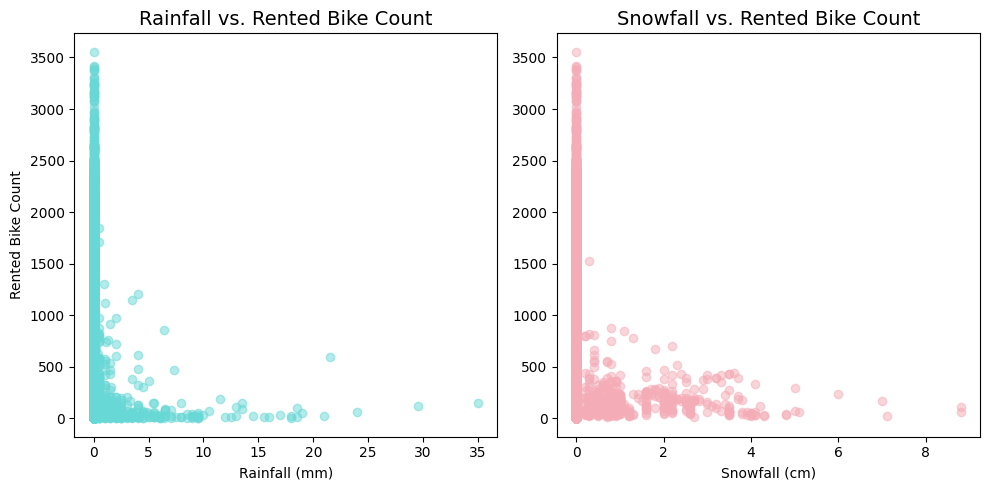

In [33]:
# Create subplots with shared y-axis
plt.figure(figsize= (10, 5))

# Plot 1. Rainfall vs. Rented Bike Count
plt.subplot(1, 2, 1)
plt.scatter(bike_df["Rainfall(mm)"], bike_df["Rented Bike Count"], color="#68d8d6", alpha= 0.5)

# Set title and axis labels
plt.title("Rainfall vs. Rented Bike Count", size= 14)
plt.xlabel("Rainfall (mm)", size= 10)
plt.ylabel("Rented Bike Count", size= 10)

# Plot 2. Snowfall vs. Rented Bike Count
plt.subplot(1, 2, 2)
plt.scatter(bike_df["Snowfall (cm)"], bike_df["Rented Bike Count"], color="#f4acb7", alpha= 0.5)

# Set title and axis labels
plt.title("Snowfall vs. Rented Bike Count", size= 14)
plt.xlabel("Snowfall (cm)", size= 10)
plt.ylabel("")

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Scatter plots were chosen as they effectively display the relationship between continuous variables like rainfall, snowfall and bike rentals. They enable easy detection of patterns, outliers and correlations. Additionally, separate plots for rainfall and snowfall allow for a clear comparison of their impact on bike rentals.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart are as follows:

The majority of data points in both the charts are clustered around 0 on the x-axis, signifying that bikes are rented on days with very low or no rainfall and snowfall.

##### 3. Will the gained insights help creating a positive business impact?

Yes, the insights can help create a positive business impact by allowing the company to:

1. Optimize Resource Allocation: Knowing that bikes are mostly rented on days with low or no precipitation helps the company allocate resources more efficiently, ensuring enough bikes are available on days with favorable weather.

2. Maintenance Scheduling: Maintenance can be scheduled on days with higher expected rainfall or snowfall, as bike rentals are likely to be lower.

Are there any insights that lead to negative growth? Justify with specific reason.

The charts themselves do not directly reflect insights that might lead to negative growth. However, the company should consider the following points:

1. Heavy reliance on favorable weather conditions could lead to significant fluctuations in demand. During periods of frequent rainfall or snowfall, the company might experience a drop in rentals.

2. If the company is not prepared for extreme weather conditions, it might lead to negative customer experiences.

#### **Chart - 9 (Relationship between Solar Radiation and Temperature)**

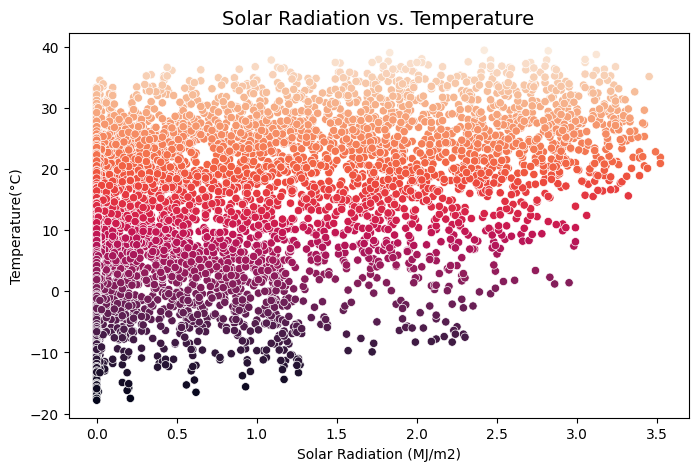

In [34]:
# Plot the chart
plt.figure(figsize= (8, 5))
sns.scatterplot(data=bike_df, x="Solar Radiation (MJ/m2)", y="Temperature(°C)", hue="Temperature(°C)", palette= "rocket")

# Set title and axis labels
plt.title("Solar Radiation vs. Temperature", size= 14)
plt.xlabel("Solar Radiation (MJ/m2)", size= 10)
plt.ylabel("Temperature(°C)", size= 10)
plt.legend().remove()

plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot was chosen for this visualization because it directly shows the relationship between weather features i.e Temperature & Humidity. Scatter plots are ideal for visualizing the patterns, outliers and the trend associated with data.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart are as follows:

- The scattered distribution of data points shows that most data points cluster between 0.0 and 0.5 on the y-axis (Solar Radiation) and between 10 and 30 on the y-axis (Temprature). This suggests that the dataset primarily consists of moderate temperatures with lower solar radiation levels. Higher solar radiation is associated with warmer temperatures, but such instances are less frequent.

##### 3. Will the gained insights help creating a positive business impact?

Yes, the insights derived from the charts can have a positive business impact in several ways:

1. The company can develop targeted marketing campaigns focusing on days with moderate temperatures and low solar radiation, potentially increasing customer engagement and rentals.

2. Knowing that bike rentals are common at moderate temperatures and lower solar radiation levels helps the company ensure bike availability during these conditions, maximizing rental opportunities.


Are there any insights that lead to negative growth? Justify with specific reason.

While the charts do not directly indicate insights that might lead to negative growth, but it is necessary to consider some points:

1.  If the company does not address the need for services in higher solar radiation and warmer temperatures, it might miss out on potential customers who wish to rent bikes during these times, leading to decreased market coverage.

2. Heavy reliance on moderate weather conditions could lead to fluctuations in demand. If the company is unprepared for extreme weather, it might face reduced rentals during less favorable conditions.

#### **Chart - 10 (Relationship between Dew Point Temperature and Rented Bike Count)**

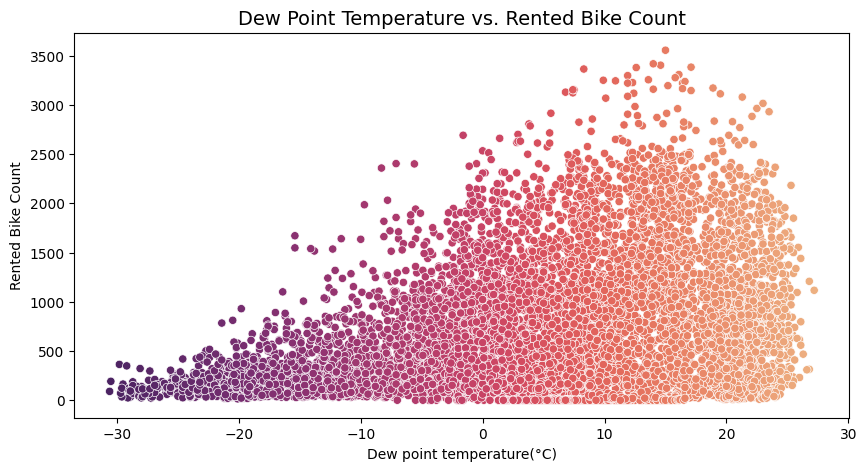

In [35]:
# Plot the chart
plt.figure(figsize= (10, 5))
sns.scatterplot(data= bike_df, x="Dew point temperature(°C)", y="Rented Bike Count", hue="Dew point temperature(°C)", palette="flare_r")

# Set title and axis labels
plt.title("Dew Point Temperature vs. Rented Bike Count", size= 14)
plt.xlabel("Dew point temperature(°C)", size= 10)
plt.ylabel("Rented Bike Count", size= 10)
plt.legend().remove()

plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot was chosen because it effectively displays the relationship between dew point temperature and bike rentals, both of which are continuous variables. This type of plot allows for easy identification of patterns, outliers, and correlation between the two factors.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart are as follows:

- The left-skewed distribution suggests that lower dew point temperatures are more common on days when bikes are rented. Lower dew point temperatures generally indicate more comfortable and less humid conditions. This insight suggests that customers may find it more pleasant to engage in outdoor activities like bike rentals on days with lower dew point temperature levels.

##### 3. Will the gained insights help creating a positive business impact?

Yes, the insights derived from the charts can have a positive business impact in several ways:

- Understanding that bike rentals are more frequent on days with lower dew point temperature levels allows the company to target promotions and services on such days. Additionally, planning maintenance and staffing during less favorable weather conditions can improve operational efficiency.

Are there any insights that lead to negative growth? Justify with specific reason.

There are no direct insights from this analysis that indicate negative growth. However, if the company does not address the preferences for comfortable weather conditions, it could miss opportunities for maximizing rentals. Ensuring services and marketing align with customer preferences can mitigate potential negative impacts.

#### **Chart - 11 (Correlation Heatmap)**

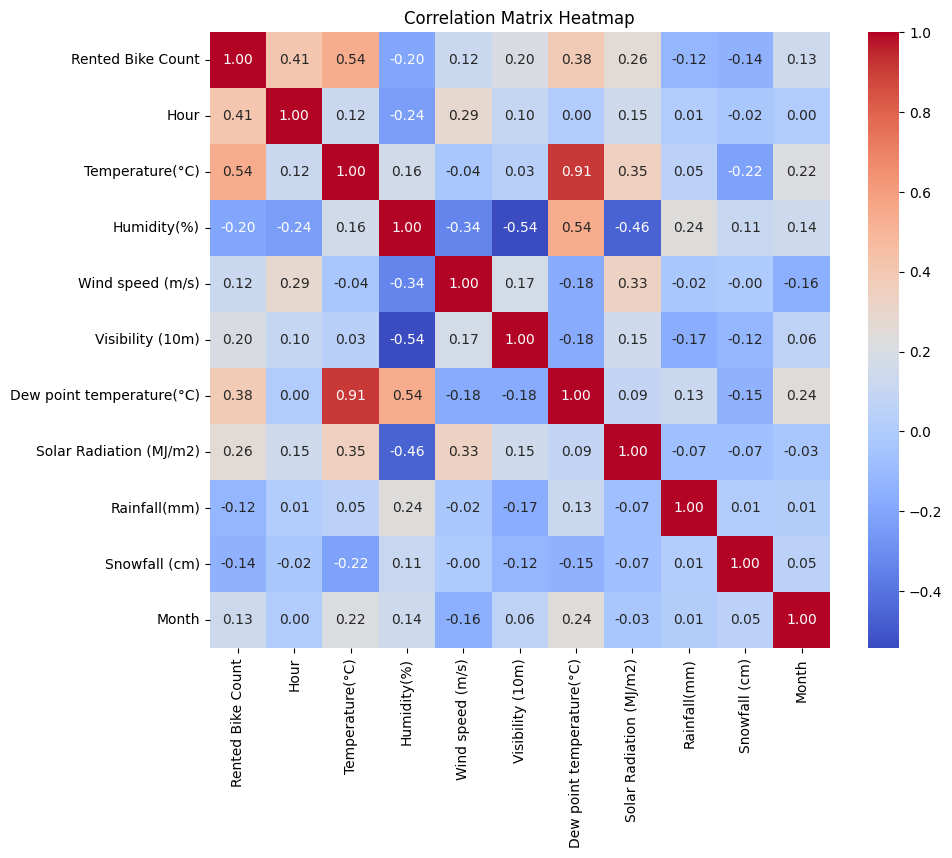

In [36]:
# Plot the heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')

plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap was chosen to visualize the relationships between multiple variables in the dataset for several reasons:

- The heatmap is specifically suited for analyzing the correlation coefficient between numerical variables and quantify the strength and direction of the relationships between pairs of columns.

- The color and intensity of each cell represent the correlation coefficient between two variables. Dark red cells indicate strong positive correlations, while dark blue cells represent strong negative correlations.

- The heatmap summarizes complex correlation data into a single easily interpretable visual, making it efficient for communication and analysis.

##### 2. What is/are the insight(s) found from the chart?

Several insights are drawn from the chart, which are as follows as:

1. The correlation coefficient between Temperature(°C) and Rented Bike Count is 0.54, indicating a moderately strong positive correlation. This suggests that as the temperature increases, the number of rented bikes tends to increase.

2. The correlation coefficient between Dew Point Temperature(°C) and Temperature(°C) is 0.90, indicating a strong positive correlation. This suggests that as the temperature increases, the Dew Point Temperature(°C) also increase.

3. The correlation coefficient between Hour and Rented Bike Count is 0.41, indicating a moderate positive correlation. This suggests that as the hour of the day increases, the number of rented bikes also tends to increase.

4. The correlation coefficient between Dew point Temperature(°C) and Rented Bike Count is 0.38, indicating a moderate positive correlation. This suggests that as the dew point temperature increases, the number of rented bikes tends to increase.

5. The correlation coefficient between Solar Radiation(Mj/m2) and Temperature(°C) is 0.35, indicating a moderate positive correlation. This suggests that as the temperature increases, the solar Radiation tends to increase which is obvious.

6. The correlation coefficient between Solar Radiation (MJ/m2) and Rented Bike Count is 0.26, indicating a moderate positive correlation. This suggests that as solar radiation increases, the number of rented bikes tends to increase.

7. The correlation coefficient between Humidity(%) and Rented Bike Count is -0.20, indicating a weak negative correlation. This suggests that as humidity increases, the number of rented bikes may tend to decrease slightly.

8. The correlation coefficients for Visibility (10m) and Wind speed (m/s) are relatively low (0.20 and 0.12 respectively), indicating weak correlations with the number of rented bikes.

9. The correlation coefficients for Rainfall(mm) and Snowfall (cm) are both negative, but their values are close to zero. This suggests a weak negative relationship with the number of rented bikes.

10. Hour, Temperature, Dew Point Temperature, and Solar Radiation have the highest positive correlations with Rented Bike Count. These variables may be important predictors in further regression model building.

#### **Chart - 12 (Pair Plot)**

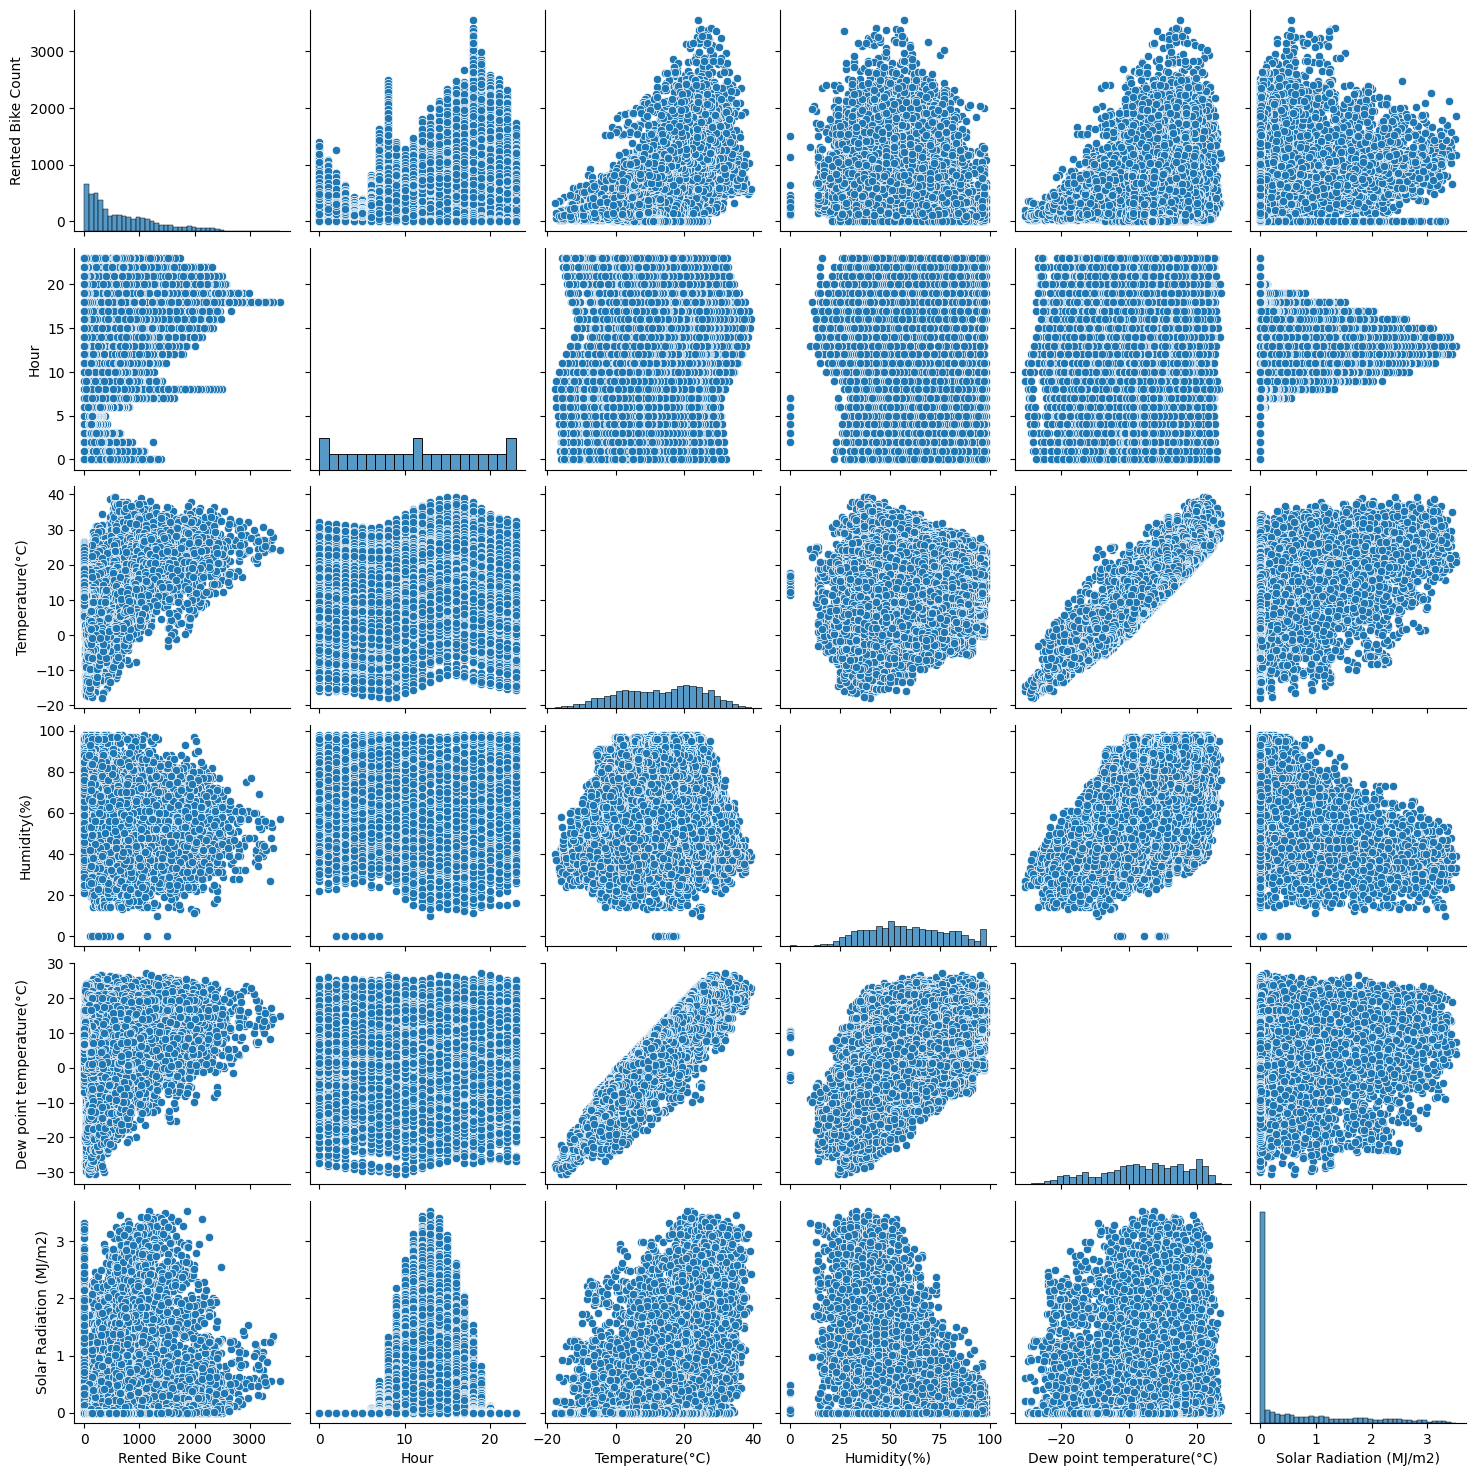

In [37]:
# Define the columns for the pairplot
variables = ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)']

# Create a pair plot
sns.pairplot(bike_df[variables])

plt.show()

##### 1. Why did you pick the specific chart?

A pair plot was chosen to visualize the relationships between pairs of variables in the dataset due to the following reasons:

- The pair plot displays scatter plots for every possible pair of variables in the dataset on a single grid. This allows to visually assess both pairwise relationships and identify potential patterns or trends across all variables simultaneously.

- By visualizing multiple variables simultaneously, the pair plot facilitates the exploration of how different variables relate to each other, revealing potential dependencies and the strength of relationships.

##### 2. What is/are the insight(s) found from the chart?

Based on the above chart there are several insights are drawn, which are as follows as:

1. Hour vs. Rented Bike Count: The left-skewed distribution suggests that during certain hours, there's a higher demand for rented bikes. This indicate peak demand of bike throughout the day.

2. Temperature vs. Rented Bike Count: The left-skewed distribution implies that as temperature increases, the demand for rented bikes tends to increase. However, there's a limit to this trend, as the distribution is not symmetrical.

3. Humidity vs. Rented Bike Count: The normal distribution indicates that there's no clear trend between humidity levels and the number of rented bikes. This suggests that humidity might not be a strong predictor on its own.

4. Dew Point Temperature vs. Rented Bike Count: The left-skewed distribution suggests that as dew point temperature rises, the demand for rented bikes generally increases. Again, there's a limit to this trend.

5. Solar Radiation vs. Rented Bike Count: The right-skewed distribution implies that as solar radiation increases, the demand for rented bikes tends to increase. This suggests that sunny days might lead to higher bike usage.

These insights provide valuable information for modeling the relationship between these variables and the number of rented bikes.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Hypothetical Statement 1:** Higher temperatures increases number of bike rentals.

**Hypothetical Statement 2:** Humidity levels impact bike rental.

**Hypothetical Statement 3:** There is no significant difference in bike rentals between working days and holidays.

### **Hypothetical Statement - 1 (Higher temperatures increases number of bike rentals)**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H₀):** Temperature does not significantly increase the number of rented bikes.

**Alternative Hypothesis (H₁):** Higher temperatures significantly increase the number of rented bikes.

#### 2. Perform an appropriate statistical test.

In [38]:
# Define variables
X = bike_df["Temperature(°C)"]
y = bike_df["Rented Bike Count"]

# Add a constant to the independent variable (temperature)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the summary statistics
summary= model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     3578.
Date:                Wed, 03 Jul 2024   Prob (F-statistic):               0.00
Time:                        08:32:40   Log-Likelihood:                -67600.
No. Observations:                8760   AIC:                         1.352e+05
Df Residuals:                    8758   BIC:                         1.352e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             329.9525      8.541     38.631      0.000     313.210     346.695
Temperature(°C)    29.0811      0.486     59.816      0.000      28.128      30.034
==============================================================================
Omnibus:                      954.681   Durbin-Watson:                   0.271
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1421.965
Skew:                           0.817   Prob(JB):                    1.68e-309
Kurtosis:                       4.108   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Results:**

- The coefficient for Temperature(°C) is approximately 29.08.

- The p-value associated with the coefficient is 0.000.

**Conclusion:**

Since the p-value is extremely low (p < 0.05), we reject the null hypothesis. This indicates that temperature has a statistically significant impact on the number of bikes rentals.

Therefore, we can conclude that higher temperatures indeed increases the number of rented bikes. This supports our Hypothetical Statement 1.

##### Which statistical test have you done to obtain P-Value?

I performed a simple linear regression using the Ordinary Least Squares (OLS) method.

##### Why did you choose the specific statistical test?

OLS regression was chosen because it effectively models the linear relationship between a continuous dependent variable (Rented Bike Count) and a continuous independent variable (Temperature(°C)). It allows an easy interpretation and provides statistical tests (t-test for coefficients) to determine if the relationships are statistically significant.

OLS regression is a widely used method in many fields for predicting a continuous outcome and is standard in cases where the assumptions of linear regression are reasonably met.

### **Hypothetical Statement - 2 (Humidity levels impact bike rental)**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H₀):** Humidity does not significantly impact the number of rented bikes.

**Alternative Hypothesis (H₁):** Humidity levels have a significant effect on bike rentals.

#### 2. Perform an appropriate statistical test.

In [39]:
# Define variables
X = bike_df["Humidity(%)"]

# Add a constant to the independent variable (temperature)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the summary statistics
summary= model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     364.1
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           1.48e-79
Time:                        08:32:40   Log-Likelihood:                -68922.
No. Observations:                8760   AIC:                         1.378e+05
Df Residuals:                    8758   BIC:                         1.379e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1073.0702     20.457     52.454      0.000    1032.969    1113.172
Humidity(%)    -6.3282      0.332    -19.081      0.000      -6.978      -5.678
==============================================================================
Omnibus:                     1397.326   Durbin-Watson:                   0.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2177.696
Skew:                           1.132   Prob(JB):                         0.00
Kurtosis:                       3.915   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Results:**

- The coefficient for Humidity(%) is approximately -6.33.

- The p-value associated with the coefficient is 0.000.

**Conclusion:**

Since the p-value is extremely low (p < 0.05), we reject the null hypothesis. This indicates that humidity levels has a statistically significant impact on the number of bikes rentals.

Therefore, we can conclude that humidity indeed impacts the number of rented bikes. This supports our Hypothetical Statement 2.

##### Which statistical test have you done to obtain P-Value?

I performed a simple linear regression using the Ordinary Least Squares (OLS) method.

##### Why did you choose the specific statistical test?

OLS regression was chosen because it effectively models the linear relationship between a continuous dependent variable (Rented Bike Count) and a continuous independent variable (Humidity(%)). It allows an easy interpretation and provides statistical tests (t-test for coefficients) to determine if the relationships are statistically significant.

### **Hypothetical Statement - 3 (There is no significant difference in bike rentals between working days and holidays)**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H₀):** There is no significant difference in bike rentals between working days and holidays.

**Alternative Hypothesis (H₁):** There is a significant difference in bike rentals between working days and holidays.

#### 2. Perform an appropriate statistical test.

In [40]:
bike_df["Holiday"].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [41]:
# Define variables
working_days = bike_df[bike_df["Holiday"] == "No Holiday"]["Rented Bike Count"]
holidays = bike_df[bike_df["Holiday"] == "Holiday"]["Rented Bike Count"]

# Perform t-test
t_stat, p_value = stats.ttest_ind(working_days, holidays)
t_stat, p_value

(6.7874340454159166, 1.2156443235024855e-11)

**Results:**

- The t-statistic is approximately 6.79

- The p-value is very close to zero (1.22e-11)

**Conclusion:**

Since the p-value is extremely low (p < 0.05), we reject the null hypothesis. This indicates that there is a statistically significant difference in bike rentals between working days and holidays.

Therefore, we can conclude that there is indeed a significant difference in bike rentals between working days and holidays. This supports our Hypothetical Statement 3.

##### Which statistical test have you done to obtain P-Value?

I performed an independent two-sample t-test to compare bike rentals on working days and holidays.

##### Why did you choose the specific statistical test?

I choose this test because, this test is appropriate for comparing the means of two independent groups (in this case, bike rentals on working days and holidays). It helps determine if there is a significant difference between the two groups.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [42]:
# Handling Missing Values & Missing Value Imputation

# Check for missing values in each column
missing_values = bike_df.isnull().sum()
print(missing_values)

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Day                          0
Month                        0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

Since there are no missing values in the dataset, there is no need to use any missing value imputation techniques.

### 2. Categorical Encoding

In [43]:
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Day', 'Month'],
      dtype='object')

In [44]:
# Check the initial state of the DataFrame
print("Initial DataFrame:")
print(bike_df.head())

# Creating new feature as "Weekend_weekdays" by converting weekends and weekdays into 1 and 0 from the 'Day' column
bike_df["Weekend_weekdays"] = bike_df["Day"].apply(lambda x: 1 if x in ["Saturday", "Sunday"] else 0)
print("\nAfter encoding 'Weekend_weekdays':")
print(bike_df[["Day", "Weekend_weekdays"]].head())

# Encoding the Holiday feature by replacing 'Holiday' and 'No Holiday' as '1' and '0' respectively
bike_df["Holiday"] = bike_df["Holiday"].apply(lambda x: 1 if x == "Holiday" else 0)
print("\nAfter encoding 'Holiday':")
print(bike_df[["Holiday"]].head())

# Encoding the Functioning Day feature by replacing 'Yes' and 'No' as '1' and '0' respectively
bike_df["Functioning Day"] = bike_df["Functioning Day"].apply(lambda x: 1 if x == "Yes" else 0)
print("\nAfter encoding 'Functioning Day':")
print(bike_df[["Functioning Day"]].head())

# Performing one-hot encoding for the 'Hour' and 'Seasons' columns
bike_df = pd.get_dummies(bike_df, columns= ["Hour", "Seasons"])
print("\nAfter one-hot encoding 'Hour' and 'Seasons':")
print(bike_df.head())

# Check the data types to ensure columns are correctly encoded
print("\nData types after encoding:")
print(bike_df.dtypes)

Initial DataFrame:
        Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  N

After performing one-hot encoding for the Hour and Season columns, the resulting values are boolean. To make them suitable for machine learning purposes, we need to convert them to integer.

And we dont need Date and Day column now, therefore dropping them.

In [45]:
# Drop Date and Day columns
bike_df.drop(["Date", "Day"], axis= 1, inplace= True)

# Convert Datatype to integer
bike_df = bike_df.astype("int64")
bike_df.head(3)

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254               -5           37                 2   
1                204               -5           38                 0   
2                173               -6           39                 1   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                        -17                        0   
1              2000                        -17                        0   
2              2000                        -17                        0   

   Rainfall(mm)  Snowfall (cm)  Holiday  ...  Hour_18  Hour_19  Hour_20  \
0             0              0        0  ...        0        0        0   
1             0              0        0  ...        0        0        0   
2             0              0        0  ...        0        0        0   

   Hour_21  Hour_22  Hour_23  Seasons_Autumn  Seasons_Spring  Seasons_Summer  \
0        0        0        0               0               0               0   
1        0        0        0               0               0               0   
2        0        0        0               0               0               0   

   Seasons_Winter  
0               1  
1               1  
2               1  

[3 rows x 41 columns]

#### What all categorical encoding techniques have you used & why did you use those techniques?

I used several categorical encoding techniques to transform the dataset:

1. Binary Encoding for 'Weekend':

- The 'Day' column is transformed into a binary feature called 'Weekend', where weekends (Saturday and Sunday) are encoded as 1, and weekdays as 0. This is done because weekends may have different patterns in bike rentals compared to weekdays.

2. Binary Encoding for 'Holiday' and 'Functioning Day':

- The 'Holiday' column is encoded as 1 if it is a holiday and 0 if it is not.

- The 'Functioning Day' column is encoded as 1 if it is a functioning day and 0 if it is not.

- These binary encodings simplify the categorical variables, making it easier for machine learning algorithms to process and interpret the data.

3. One-Hot Encoding for 'Seasons' and 'Hour':

- The 'Seasons' column is one-hot encoded, creating separate binary columns for each season (e.g., 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Autumn', 'Seasons_Winter'). One-hot encoding is used because there is no ordinal relationship between the seasons.

- The 'Hour' column is one-hot encoded, creating binary columns for each hour of the day (e.g., 'Hour_0', 'Hour_1', ..., 'Hour_23'). This allows the model to understand the cyclical nature of the hours without implying any order or priority between them.

These encoding techniques are chosen to effectively represent categorical variables in a format suitable for machine learning algorithms, improving model performance and interpretability.

### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [46]:
def calculate_vif(variables):
  """
  This function calculates the Variance Inflation Factor (VIF) for each variable
  in a DataFrame to detect multicollinearity among the predictor variables.

  Parameters:
  - variables: DataFrame containing the predictor variables.

  Returns:
  - vif_data: DataFrame with two columns:
     'Variable': The names of the predictor variables.
     'VIF': The Variance Inflation Factor for each variable.
  """

  # Create an empty DataFrame to store VIF values
  vif_data = pd.DataFrame()

  vif_data["Variable"] = variables.columns

  # Calculate VIF for each variable
  vif_data["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

  return vif_data

In [47]:
calculate_vif(bike_df[[i for i in bike_df.columns if i not in ['Rented Bike Count']]])

Variable         VIF
0             Temperature(°C)   81.255033
1                 Humidity(%)   18.294792
2            Wind speed (m/s)    1.369281
3            Visibility (10m)    1.715182
4   Dew point temperature(°C)  105.364810
5     Solar Radiation (MJ/m2)    2.813082
6                Rainfall(mm)    1.083119
7               Snowfall (cm)    1.100831
8                     Holiday    1.029715
9             Functioning Day    1.083152
10                      Month    1.837599
11           Weekend_weekdays    1.011815
12                     Hour_0         inf
13                     Hour_1         inf
14                     Hour_2         inf
15                     Hour_3         inf
16                     Hour_4         inf
17                     Hour_5         inf
18                     Hour_6         inf
19                     Hour_7         inf
20                     Hour_8         inf
21                     Hour_9         inf
22                    Hour_10         inf
23                    Hour_11         inf
24                    Hour_12         inf
25                    Hour_13         inf
26                    Hour_14         inf
27                    Hour_15         inf
28                    Hour_16         inf
29                    Hour_17         inf
30                    Hour_18         inf
31                    Hour_19         inf
32                    Hour_20         inf
33                    Hour_21         inf
34                    Hour_22         inf
35                    Hour_23         inf
36             Seasons_Autumn         inf
37             Seasons_Spring         inf
38             Seasons_Summer         inf
39             Seasons_Winter         inf

In [48]:
bike_df.drop('Dew point temperature(°C)', axis= 1, inplace= True)
calculate_vif(bike_df[[i for i in bike_df.columns if i not in ['Rented Bike Count']]])

Variable       VIF
0           Temperature(°C)  5.232894
1               Humidity(%)  2.632839
2          Wind speed (m/s)  1.367935
3          Visibility (10m)  1.715154
4   Solar Radiation (MJ/m2)  2.723311
5              Rainfall(mm)  1.073079
6             Snowfall (cm)  1.094839
7                   Holiday  1.029715
8           Functioning Day  1.083148
9                     Month  1.837456
10         Weekend_weekdays  1.007507
11                   Hour_0       inf
12                   Hour_1       inf
13                   Hour_2       inf
14                   Hour_3       inf
15                   Hour_4       inf
16                   Hour_5       inf
17                   Hour_6       inf
18                   Hour_7       inf
19                   Hour_8       inf
20                   Hour_9       inf
21                  Hour_10       inf
22                  Hour_11       inf
23                  Hour_12       inf
24                  Hour_13       inf
25                  Hour_14       inf
26                  Hour_15       inf
27                  Hour_16       inf
28                  Hour_17       inf
29                  Hour_18       inf
30                  Hour_19       inf
31                  Hour_20       inf
32                  Hour_21       inf
33                  Hour_22       inf
34                  Hour_23       inf
35           Seasons_Autumn       inf
36           Seasons_Spring       inf
37           Seasons_Summer       inf
38           Seasons_Winter       inf

In [49]:
bike_df.drop('Temperature(°C)', axis= 1, inplace= True)
calculate_vif(bike_df[[i for i in bike_df.columns if i not in ['Rented Bike Count']]])

Variable       VIF
0               Humidity(%)  2.587698
1          Wind speed (m/s)  1.351108
2          Visibility (10m)  1.714508
3   Solar Radiation (MJ/m2)  2.551376
4              Rainfall(mm)  1.072254
5             Snowfall (cm)  1.088363
6                   Holiday  1.023233
7           Functioning Day  1.077002
8                     Month  1.831871
9          Weekend_weekdays  1.006947
10                   Hour_0       inf
11                   Hour_1       inf
12                   Hour_2       inf
13                   Hour_3       inf
14                   Hour_4       inf
15                   Hour_5       inf
16                   Hour_6       inf
17                   Hour_7       inf
18                   Hour_8       inf
19                   Hour_9       inf
20                  Hour_10       inf
21                  Hour_11       inf
22                  Hour_12       inf
23                  Hour_13       inf
24                  Hour_14       inf
25                  Hour_15       inf
26                  Hour_16       inf
27                  Hour_17       inf
28                  Hour_18       inf
29                  Hour_19       inf
30                  Hour_20       inf
31                  Hour_21       inf
32                  Hour_22       inf
33                  Hour_23       inf
34           Seasons_Autumn       inf
35           Seasons_Spring       inf
36           Seasons_Summer       inf
37           Seasons_Winter       inf

#### 2. Feature Selection

In [50]:
# Selecting the features
features = list(set(bike_df.describe().columns))

# Exclude the 'Rented Bike Count' column
if 'Rented Bike Count' in features:
    features.remove('Rented Bike Count')

features

['Hour_5',
 'Hour_22',
 'Hour_1',
 'Hour_17',
 'Hour_8',
 'Rainfall(mm)',
 'Hour_10',
 'Holiday',
 'Month',
 'Hour_9',
 'Hour_16',
 'Hour_23',
 'Snowfall (cm)',
 'Hour_7',
 'Hour_6',
 'Hour_14',
 'Wind speed (m/s)',
 'Hour_13',
 'Solar Radiation (MJ/m2)',
 'Hour_15',
 'Humidity(%)',
 'Weekend_weekdays',
 'Hour_21',
 'Hour_11',
 'Hour_18',
 'Seasons_Summer',
 'Seasons_Autumn',
 'Hour_2',
 'Seasons_Winter',
 'Hour_19',
 'Hour_4',
 'Functioning Day',
 'Hour_12',
 'Hour_20',
 'Seasons_Spring',
 'Hour_0',
 'Hour_3',
 'Visibility (10m)']

##### What all feature selection methods have you used  and why?

I used the Variance Inflation Factor (VIF) method to detect and remove highly correlated variables ('Dew point temperature(°C)' and 'Temperature(°C)').

**Interpretation:**
- A VIF of 1 means that predictor is not correlated with other variables.
- A VIF between 1 to 5 typically indicates moderate correlation (not severe enough to require attention).
- A VIF above 5 and 10 (the threshold can vary based on the field of study) suggests high correlation that may be problematic.

The remaining features were selected based on their potential impact on predicting target variable ('Rented Bike Count').

##### Which all features you found important and why?

The features that I found important for predicting 'Rented Bike Count' are:

1. Humidity(%)
2. Rainfall(mm)
3. Wind speed (m/s)
4. Visibility (10m)
5. Solar Radiation (MJ/m2)
6. Snowfall (cm)
7. Holiday
8. Functioning Day
9. Weekend_weekdays
10. Seasons_Autumn
11. Seasons_Spring
12. Seasons_Summer
13. Seasons_Winter
14. Month
15. Hour_0
16. Hour_1
17. Hour_2
18. Hour_3
19. Hour_4
20. Hour_5
21. Hour_6
22. Hour_7
23. Hour_8
24. Hour_9
25. Hour_10
26. Hour_11
27. Hour_12
28. Hour_13
29. Hour_14
30. Hour_15
31. Hour_16
32. Hour_17
33. Hour_18
34. Hour_19
35. Hour_20
36. Hour_21
37. Hour_22
38. Hour_23

These features were considered important because they capture various environmental and temporal factors that likely influence the demand for rented bikes. Factors such as weather conditions, day, month and seasonality  are known to play a significant role in bike rental patterns.

### 4. Data Splitting

In [51]:
# Split your data to train and test
X = bike_df.drop("Rented Bike Count", axis= 1)

# Using square root to normalize the dependent variable
y = np.sqrt(bike_df["Rented Bike Count"])

# Spliting the data to train and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (6132, 38)
Shape of x_test: (2628, 38)
Shape of y_train: (6132,)
Shape of y_test: (2628,)


##### What data splitting ratio have you used and why?

I have used 70-30 data splitting ratio, allocating 70% for training and 30% for testing. This is a common and balanced approach to ensure enough data for training and reliable evaluation of model performance.

### 5. Data Scaling

In [52]:
# Scaling the data by using Standardization method
scaler = StandardScaler()

# Fitting x_train and x_test
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print("x_train:", x_train)
print("\nx_test:", x_test)

x_train: [[ 1.08092632 -1.17532763  0.91950241 ... -0.58111646  1.72829283
  -0.57082207]
 [-0.98397665  0.67028288  0.7024617  ... -0.58111646  1.72829283
  -0.57082207]
 [-1.13146972 -0.25252238  0.21247586 ...  1.72082547 -0.57860565
  -0.57082207]
 ...
 [-0.04985388 -0.25252238 -0.81846752 ... -0.58111646  1.72829283
  -0.57082207]
 [ 0.04847484  0.67028288  0.77480861 ...  1.72082547 -0.57860565
  -0.57082207]
 [ 1.22841939  1.59308813 -2.03521089 ...  1.72082547 -0.57860565
  -0.57082207]]

x_test: [[ 0.73677583 -0.25252238  0.91950241 ...  1.72082547 -0.57860565
  -0.57082207]
 [ 0.98259761 -0.25252238  0.91950241 ... -0.58111646 -0.57860565
  -0.57082207]
 [ 0.34346097  2.51589338 -0.62444628 ... -0.58111646 -0.57860565
   1.75185938]
 ...
 [ 1.91672038 -0.25252238 -1.01248876 ... -0.58111646  1.72829283
  -0.57082207]
 [-0.73815487 -1.17532763  0.18781214 ... -0.58111646 -0.57860565
   1.75185938]
 [ 1.08092632  0.67028288 -1.98423921 ...  1.72082547 -0.57860565
  -0.57082207]

##### Which method have you used to scale you data and why?

I used Standardization to scale the data. This method transforms the data to have a mean of 0 and a standard deviation of 1. It's beneficial for comparing features with different units or scales, and is less sensitive to outliers compared to other scaling methods.

## ***7. ML Model Implementation***

In [53]:
# Defining a function to calculate accuracy scores of models
def calc_accu_score(true, pred):
  """
  This function calculates and prints various accuracy metrics for a regression model.

  Parameters:
  - true: true values.
  - pred: predicted values.
  """
  # Calculate Mean Squared Error (MSE)
  MSE = mean_squared_error(true, pred)
  print(f"Mean Squared Error (MSE): {MSE}")

  # Calculate Mean Absolute Error (MAE)
  MAE = mean_absolute_error(true, pred)
  print(f"Mean Absolute Error (MAE): {MAE}")

  # Calculate Root Mean Squared Error (RMSE)
  RMSE = np.sqrt(MSE)
  print(f"Root Mean Squared Error (RMSE): {RMSE}")

  # Calculate R2 Score
  R2 = r2_score(true, pred)
  print(f"R2 Score: {R2}")

  return MSE, MAE, RMSE, R2

In [54]:
# Making an empty dataframe to store all the accuracy scores of each model
score_df = pd.DataFrame(columns= ["Model", "Mean Squared Error (MSE)", "Mean Absolute Error (MAE)", \
                                 "Root Mean Squared Error (RMSE)", "R2 Score"])

# Define a function to append the scores of each model in the dataframe.
def store_scores(model, mse, mae, rmse, r2):
  scores = {
      "Model": model,
      "Mean Squared Error (MSE)": mse,
      "Mean Absolute Error (MAE)": mae,
      "Root Mean Squared Error (RMSE)": rmse,
      "R2 Score": r2
  }

  global score_df
  score_df = pd.concat([score_df, pd.DataFrame(scores, index= [0])], ignore_index= True)

  return score_df

In [55]:
# Defining a function to visualize the linearity of actual and predicted data.
def reg_scatter(true, pred):
  plt.figure(figsize= (10, 7))
  sns.regplot(x= true, y= pred, scatter_kws= {"color":"blue", "alpha": 0.5}, line_kws= {"color":"black"})
  plt.legend(["Actual", "Predicted"])

  plt.show()

### **ML Model - 1: Linear Regression**

In [56]:
# ML Model - 1 Implementation
lin_reg_model = LinearRegression()

# Fit the Algorithm
reg = lin_reg_model.fit(x_train, y_train)

# Predict on the model
y_train_pred = reg.predict(x_train)
y_test_pred = reg.predict(x_test)

# Getting the coefficient and intercept from the model
print(f"The coefficients of the model are:\n\n {reg.coef_}")
print(f"\nThe intercept of the model is: {reg.intercept_}")

The coefficients of the model are:

 [-2.69607702e+00 -3.75179292e-01  1.07094762e-01  1.37795084e+00
 -1.65477949e+00 -2.57456373e-01 -5.60889263e-01  4.74444458e+00
  7.49464463e-01 -5.78358408e-01 -2.66485110e+13 -2.68970536e+13
 -2.71917312e+13 -2.67979662e+13 -2.63465716e+13 -2.61940525e+13
 -2.64980518e+13 -2.72891111e+13 -2.64476727e+13 -2.66984401e+13
 -2.64980518e+13 -2.64476727e+13 -2.62958482e+13 -2.68475645e+13
 -2.69464343e+13 -2.69957071e+13 -2.70939314e+13 -2.68475645e+13
 -2.60404764e+13 -2.71428841e+13 -2.59890462e+13 -2.73860755e+13
 -2.65984703e+13 -2.59374958e+13  2.27805732e+13  2.28246905e+13
  2.27756499e+13  2.26208860e+13]

The intercept of the model is: 23.58161794469218


In [57]:
# Calculating model performance score for train data
mse_train, mae_train, rmse_train, r2_train = calc_accu_score(y_train, y_train_pred)

Mean Squared Error (MSE): 44.96640448275964
Mean Absolute Error (MAE): 5.1914349319729585
Root Mean Squared Error (RMSE): 6.705699402952659
R2 Score: 0.7109245938647984


In [58]:
# Calculating model performance score for test data
mse_test, mae_test, rmse_test, r2_test = calc_accu_score(y_test, y_test_pred)

Mean Squared Error (MSE): 42.824751444074266
Mean Absolute Error (MAE): 5.1507931713346915
Root Mean Squared Error (RMSE): 6.5440623044156805
R2 Score: 0.7211895498920484


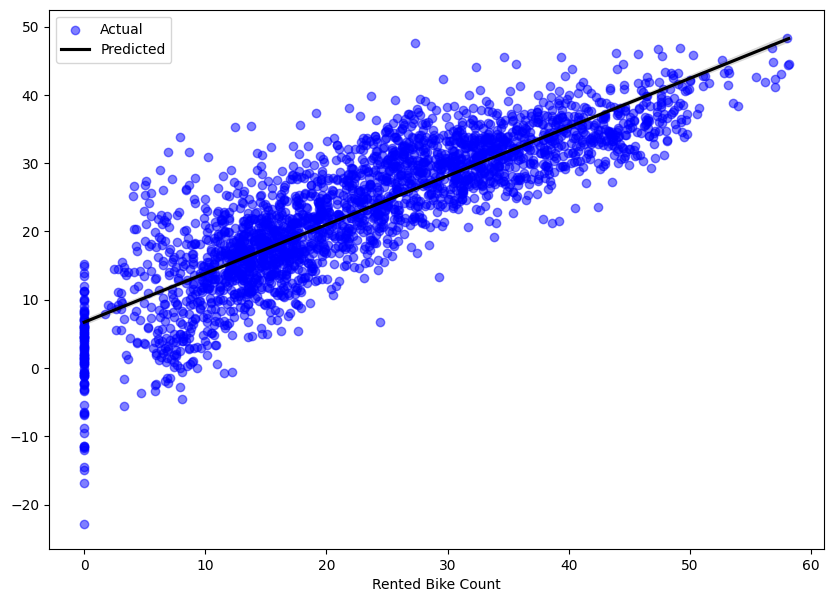

In [59]:
# Visualizing linearity between actual and predicted data
reg_scatter(y_test, y_test_pred)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [60]:
# Putting the score of the test data in the evaluation metric
evaluation_metric_score_chart = store_scores('Linear Regression', mse_test, mae_test, rmse_test, r2_test)
evaluation_metric_score_chart

Model  Mean Squared Error (MSE)  Mean Absolute Error (MAE)  \
0  Linear Regression                 42.824751                   5.150793   

   Root Mean Squared Error (RMSE)  R2 Score  
0                        6.544062   0.72119

The model used is **Linear Regression**, which models a linear relationship and predicts a continuous dependent variable based on one or more independent variables.

The evaluation metrics are:

- MSE (Mean Squared Error): Approximately 42.82, suggesting larger discrepancies in prediction errors.

- MAE (Mean Absolute Error): Approximately 5.15, indicating an average prediction error of about 5.15 units.

- RMSE (Root Mean Squared Error): Approximately 6.54, showing an average error of about 6.54 units.

- R2 Score: Approximately 0.72, indicating that around 72% of the variability in the target variable is captured by the model.

Overall, the model provides a reasonably good fit to the data, with the R2 score indicating a satisfactory level of explained variance.

#### 2. Cross- Validation & Hyperparameter Tuning

In [61]:
# Performing cross-validation
cv_scores = cross_val_score(lin_reg_model, x_train, y_train, cv= 5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive for interpretation
mse_scores = -cv_scores

# Calculate the mean and standard deviation of the MSE scores
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

print(f'Mean MSE: {mean_mse}')
print(f'Standard Deviation of MSE: {std_mse}')

Mean MSE: 45.67079061788551
Standard Deviation of MSE: 1.4509530615775228


##### Which hyperparameter optimization technique have you used and why?

I performed 5-fold cross-validation to evaluate the performance of the Linear Regression model. However, hyperparameter optimization is not applicable for Linear Regression because it doesn't have adjustable hyperparameters like other models.

### **ML Model - 2: (Lasso Regression)**

In [62]:
# ML Model - 2 Implementation
lasso = Lasso()

# Fit the Algorithm
lasso.fit(x_train, y_train)

# Predict on the model
lasso_y_train_pred = lasso.predict(x_train)
lasso_y_test_pred = lasso.predict(x_test)

# Getting the coefficient and intercept from the model
print(f"The coefficients of the model are:\n\n {np.array(lasso.coef_)}")
print(f"\nThe intercept of the model is: {lasso.intercept_}")

The coefficients of the model are:

 [-2.50581723  0.          0.          0.         -0.67884858 -0.
 -0.          3.59173381  0.183934   -0.         -0.         -0.
 -0.46113091 -1.01166825 -1.40207364 -1.28147163 -0.37997348 -0.
  0.13887743 -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.19317733  1.21068393  0.52748898
  0.09006275  0.1439586   0.         -0.          0.         -0.
  1.41179638 -4.87111385]

The intercept of the model is: 23.57934454543813


In [63]:
# Calculating model performance score for train data
mse_train, mae_train, rmse_train, r2_train = calc_accu_score(y_train, lasso_y_train_pred)

Mean Squared Error (MSE): 64.12763782292049
Mean Absolute Error (MAE): 6.2919654187515555
Root Mean Squared Error (RMSE): 8.00797339049778
R2 Score: 0.5877428235281895


In [64]:
# Calculating model performance score for test data
mse_test, mae_test, rmse_test, r2_test = calc_accu_score(y_test, lasso_y_test_pred)

Mean Squared Error (MSE): 62.79200047715648
Mean Absolute Error (MAE): 6.31197392362006
Root Mean Squared Error (RMSE): 7.924140362030223
R2 Score: 0.5911928189687792


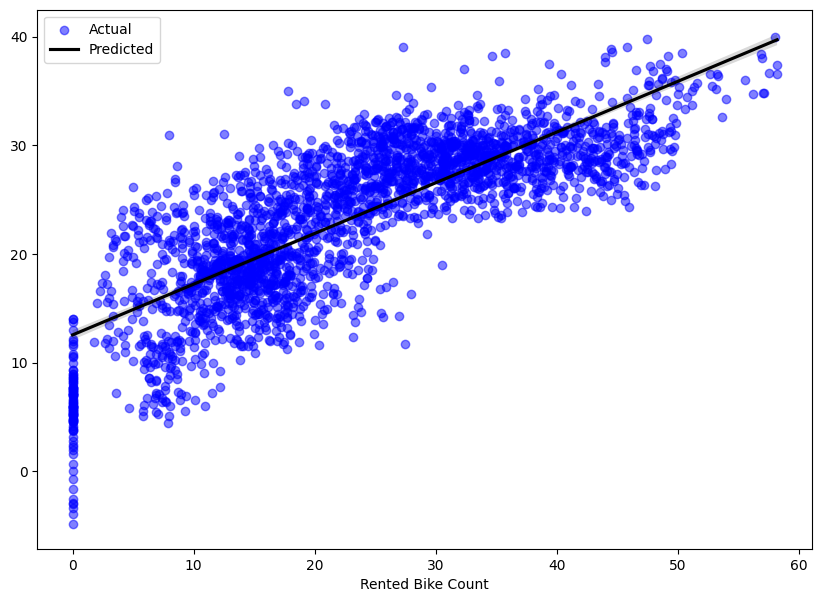

In [65]:
# Visualizing linearity between actual and predicted data
reg_scatter(y_test, lasso_y_test_pred)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [66]:
# Putting the score of the test data in the evaluation metric
evaluation_metric_score_chart = store_scores('Lasso Regression', mse_test, mae_test, rmse_test, r2_test)
evaluation_metric_score_chart

Model  Mean Squared Error (MSE)  Mean Absolute Error (MAE)  \
0  Linear Regression                 42.824751                   5.150793   
1   Lasso Regression                 62.792000                   6.311974   

   Root Mean Squared Error (RMSE)  R2 Score  
0                        6.544062  0.721190  
1                        7.924140  0.591193

The model used is **Lasso Regression**, a linear regression technique with a penalty term on coefficients (L1 regularization) for feature selection.

The evaluation metrics are:

- MSE (Mean Squared Error): Approximately 62.79, suggesting larger discrepancies in prediction errors.

- MAE (Mean Absolute Error): Approximately 6.31, indicating an average prediction error of about 6.31 units.

- RMSE (Root Mean Squared Error): Approximately 7.92, showing an average error of about 7.92 units.

- R2 Score: Approximately 0.59, indicating that around 59% of the variability in the target variable is captured by the model.

The Lasso Regression model provides a moderate fit to the data. It is a reasonable starting point, but further improvements could enhance its performance.

#### 2. Cross- Validation & Hyperparameter Tuning

In [67]:
# ML Model - 2 Implementation with hyperparameter optimization technique (GridSearch CV)
# Create the model
model = Lasso()

# Define the hyperparameters to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45, 50],}

# Create the grid search object
lasso_grid = GridSearchCV(model, params, cv= 5)

# Fit the model
lasso_grid.fit(x_train, y_train)

# Print the best parameters
print(f"Best hyperparameters: {lasso_grid.best_params_}")
print(f"Best mean cross-validation score: {lasso_grid.best_score_:.2f}")

Best hyperparameters: {'alpha': 0.01}
Best mean cross-validation score: 0.71


In [68]:
# Using the tuned hyperparameter
lasso_tuned = Lasso(alpha = 0.01)

# Fit the Algorithm
lasso_tuned.fit(x_train, y_train)

# Predict on the model
lasso_y_train_pred_tuned = lasso_tuned.predict(x_train)
lasso_y_test_pred_tuned = lasso_tuned.predict(x_test)

# Getting the coefficients and intercept from the model
print(f"The coefficients of the model are:\n\n {np.array(lasso_tuned.coef_)}")
print(f"\nThe intercept of the model is: {lasso_tuned.intercept_}")

The coefficients of the model are:

 [-2.69090163 -0.34296045  0.12764528  1.32299041 -1.63625824 -0.2401707
 -0.57834725  4.72931817  0.7609354  -0.56957669 -0.0790679  -0.54938954
 -1.17867195 -1.71207998 -2.12656723 -2.0156216  -1.06509466  0.18365411
  1.25541146  0.12424043 -0.6317185  -0.54719714 -0.34307155 -0.33087525
 -0.28465538  0.          0.51587536  1.25108512  2.37485601  1.6955688
  1.2906764   1.35007135  0.99162461  0.21633754  0.89786485 -0.
  2.29045929 -4.94206852]

The intercept of the model is: 23.57934454543813


In [69]:
# Calculating model performance score for train data
mse_train, mae_train, rmse_train, r2_train = calc_accu_score(y_train, lasso_y_train_pred_tuned)

Mean Squared Error (MSE): 44.95600006702977
Mean Absolute Error (MAE): 5.191464343787939
Root Mean Squared Error (RMSE): 6.704923569066971
R2 Score: 0.710991480704814


In [70]:
# Calculating model performance score for test data
mse_test, mae_test, rmse_test, r2_test = calc_accu_score(y_test, lasso_y_test_pred_tuned)

Mean Squared Error (MSE): 42.87492108562564
Mean Absolute Error (MAE): 5.150695796118633
Root Mean Squared Error (RMSE): 6.547894400921997
R2 Score: 0.720862920551048


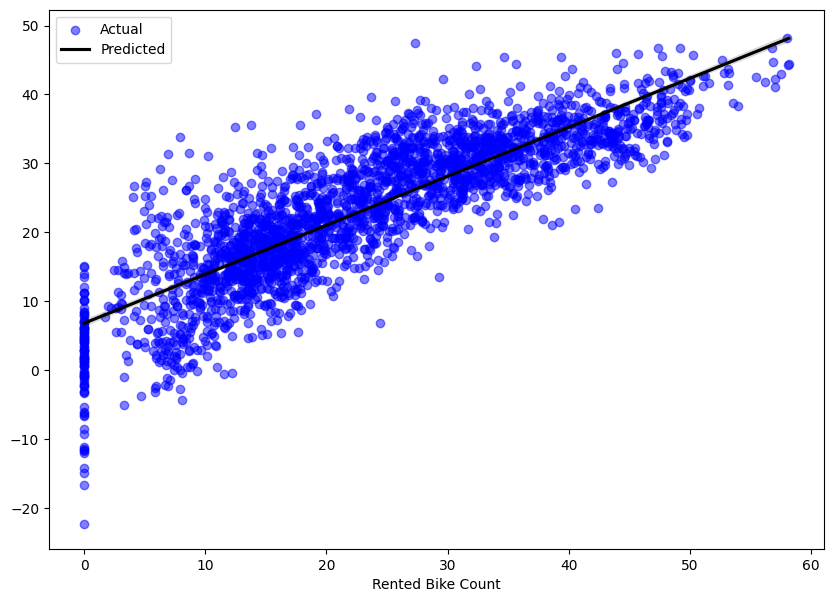

In [71]:
# Visualizing linearity between actual and predicted data
reg_scatter(y_test, lasso_y_test_pred_tuned)

##### Which hyperparameter optimization technique have you used and why?

I used Grid Search Cross Validation for hyperparameter optimization. This technique exhaustively searches through a specified hyperparameter grid to find the best combination for model performance. It's effective for fine-tuning models with a small number of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [72]:
# Putting the score of the test data in the evaluation metric
evaluation_metric_score_chart = store_scores('Lasso Regression (Grid Search CV)', mse_test, mae_test, rmse_test, r2_test)
evaluation_metric_score_chart

Model  Mean Squared Error (MSE)  \
0                  Linear Regression                 42.824751   
1                   Lasso Regression                 62.792000   
2  Lasso Regression (Grid Search CV)                 42.874921   

   Mean Absolute Error (MAE)  Root Mean Squared Error (RMSE)  R2 Score  
0                   5.150793                        6.544062  0.721190  
1                   6.311974                        7.924140  0.591193  
2                   5.150696                        6.547894  0.720863

Yes, there is an improvement in the model performance after applying Grid Search Cross Validation for hyperparameter tuning:

For Lasso Regression:

- Mean Squared Error (MSE) improved from 62.79 to 42.87

- Mean Absolute Error (MAE) improved from 6.31 to 5.15

- Root Mean Squared Error (RMSE) improved from 7.92 to 6.55

- R2 Score improved from 0.59 to 0.72

These improvements indicate that the model's predictive accuracy has been enhanced after tuning the hyperparameters using Grid Search Cross Validation.

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

**1. Mean Squared Error (MSE)**

MSE: Approximately 42.87

- **Indication:** Measures the average squared difference between predicted and actual values. A lower MSE indicates smaller prediction errors.

- **Business Impact:** A lower MSE (42.87 in this case) suggests relatively smaller prediction errors, which can lead to more accurate forecasts in bike rental demand. This can optimize resource allocation and improve operational efficiency.

**2. Mean Absolute Error (MAE)**

MAE: Approximately 5.15

- **Indication:** Represents the average magnitude of errors in predictions, irrespective of direction.

- **Business Impact:** An MAE of 5.15 means that on an average, predictions deviate by about 5.15 units. This level of accuracy (lower MAE) indicates more precise forecasts, benefiting operational planning and customer satisfaction.

**3. Root Mean Squared Error (RMSE)**

RMSE: Approximately 6.55

- **Indication:** RMSE is the square root of MSE, giving a sense of the average magnitude of errors with higher sensitivity to large errors.

- **Business Impact:** An RMSE of 6.55 suggests that most predictions are relatively close to the actual values, with occasional larger errors. This helps in understanding the typical prediction error and its implications for resource management.

**4. R-squared (R2 Score)**

R2 Score: Approximately 0.72

- **Indication:** Measures the proportion of variance in the target variable explained by the model. A higher R2 score indicates better model fit.

- **Business Impact:** An R2 score of 0.72 indicates that 72% of the variability in bike rentals is explained by the model. This demonstrates a good level of predictive power, enabling informed decision-making for operational and strategic purposes.

### **ML Model - 3: Ridge Regression**

In [73]:
# ML Model - 3 Implementation
ridge = Ridge()

# Fit the Algorithm
ridge.fit(x_train, y_train)

# Predict on the model
ridge_y_train_pred = ridge.predict(x_train)
ridge_y_test_pred = ridge.predict(x_test)

# Getting the coefficients and intercept from the model
print(f"The coefficients of the model are:\n\n {np.array(ridge.coef_)}")
print(f"\nThe intercept of the model is: {ridge.intercept_}")

The coefficients of the model are:

 [-2.69123485 -0.36506371  0.12871426  1.36583081 -1.6436553  -0.24877447
 -0.58843292  4.74069731  0.7645357  -0.58154934 -0.10198853 -0.57285968
 -1.202894   -1.73595852 -2.15042568 -2.03966582 -1.08894263  0.1777028
  1.24919874  0.11634249 -0.66297192 -0.58076401 -0.37990321 -0.36796811
 -0.32046119 -0.01302213  0.50676033  1.24592881  2.37237183  1.69312938
  1.28868815  1.34661391  0.98807569  0.21268608  1.33567054  0.42346409
  2.72120425 -4.51220048]

The intercept of the model is: 23.57934454543813


In [74]:
# Calculating model performance score for train data
mse_train, mae_train, rmse_train, r2_train = calc_accu_score(y_train, ridge_y_train_pred)

Mean Squared Error (MSE): 44.951849263783366
Mean Absolute Error (MAE): 5.190090347962585
Root Mean Squared Error (RMSE): 6.704614027949958
R2 Score: 0.7110181649627182


In [75]:
# Calculating model performance score for test data
mse_test, mae_test, rmse_test, r2_test = calc_accu_score(y_test, ridge_y_test_pred)

Mean Squared Error (MSE): 42.85727178443373
Mean Absolute Error (MAE): 5.14842647803732
Root Mean Squared Error (RMSE): 6.546546554056858
R2 Score: 0.7209778262876483


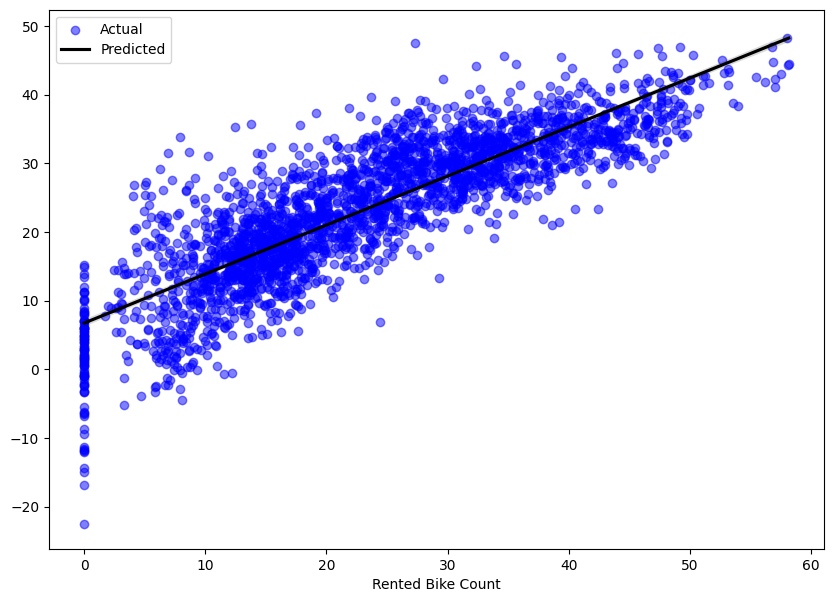

In [76]:
# Visualizing linearity between actual and predicted data
reg_scatter(y_test, ridge_y_test_pred)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [77]:
# Putting the score of the test data in the evaluation metric
evaluation_metric_score_chart = store_scores('Ridge Regression', mse_test, mae_test, rmse_test, r2_test)
evaluation_metric_score_chart

Model  Mean Squared Error (MSE)  \
0                  Linear Regression                 42.824751   
1                   Lasso Regression                 62.792000   
2  Lasso Regression (Grid Search CV)                 42.874921   
3                   Ridge Regression                 42.857272   

   Mean Absolute Error (MAE)  Root Mean Squared Error (RMSE)  R2 Score  
0                   5.150793                        6.544062  0.721190  
1                   6.311974                        7.924140  0.591193  
2                   5.150696                        6.547894  0.720863  
3                   5.148426                        6.546547  0.720978

The model used is **Ridge Regression**, which applies a penalty term to the coefficients to prevent overfitting.

The evaluation metrics are:

- MSE (Mean Squared Error): Approximately 42.86, suggesting larger discrepancies in prediction errors.

- MAE (Mean Absolute Error): Approximately 5.15, indicating an average prediction error of about 5.15 units.

- RMSE (Root Mean Squared Error): Approximately 6.55, showing an average error of about 6.55 units.

- R2 Score: Approximately 0.72, indicating that around 72% of the variability in the target variable is captured by the model.

The Ridge Regression model provides a reasonably good fit to the data, with R2 score indicating a substantial level of explained variance. It is a reasonable starting point, but further improvements could enhance its performance even better.

#### 2. Cross- Validation & Hyperparameter Tuning

In [78]:
# Implementation with hyperparameter optimization techniques (GridSearch CV)
# Create the model
model = Ridge()

# Define the hyperparameters to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45, 50],}
# Create the grid search object
ridge_grid = GridSearchCV(model, params, cv= 5)

# Fit the model
ridge_grid.fit(x_train, y_train)

# Print the best parameters
print(f"Best hyperparameters: {ridge_grid.best_params_}")
print(f"Best mean cross-validation score: {ridge_grid.best_score_:.2f}")

Best hyperparameters: {'alpha': 20}
Best mean cross-validation score: 0.71


In [79]:
# Using the tuned hyperparameter
ridge_tuned = Ridge(alpha = 20)

# Fit the Algorithm
ridge_tuned.fit(x_train, y_train)

# Predict on the model
ridge_y_train_pred_tuned = ridge_tuned.predict(x_train)
ridge_y_test_pred_tuned = ridge_tuned.predict(x_test)

# Getting the coefficients and intercept from the model
print(f"The coefficients of the model are:\n\n {np.array(ridge_tuned.coef_)}")
print(f"\nThe intercept of the model is: {ridge_tuned.intercept_}")

The coefficients of the model are:

 [-2.66943258 -0.36051486  0.1412304   1.36544192 -1.64009775 -0.25247549
 -0.58907688  4.72454057  0.76745324 -0.57856857 -0.10323416 -0.57266873
 -1.20049248 -1.73233592 -2.14556473 -2.03549947 -1.08766914  0.17579377
  1.24526996  0.11608647 -0.65985763 -0.57734907 -0.37687555 -0.36447573
 -0.3170363  -0.01103876  0.50698717  1.24372339  2.3658189   1.68829212
  1.28453023  1.34186072  0.98426289  0.21115047  1.32706522  0.42484346
  2.71216723 -4.49582737]

The intercept of the model is: 23.57934454543813


In [80]:
# Calculating model performance score for train data
mse_train, mae_train, rmse_train, r2_train = calc_accu_score(y_train, ridge_y_train_pred_tuned)

Mean Squared Error (MSE): 44.95298731199081
Mean Absolute Error (MAE): 5.190748490308772
Root Mean Squared Error (RMSE): 6.704698897936492
R2 Score: 0.7110108487952027


In [81]:
# Calculating model performance score for test data
mse_test, mae_test, rmse_test, r2_test = calc_accu_score(y_test, ridge_y_test_pred_tuned)

Mean Squared Error (MSE): 42.873072348106476
Mean Absolute Error (MAE): 5.149467234752189
Root Mean Squared Error (RMSE): 6.5477532290172995
R2 Score: 0.7208749567526012


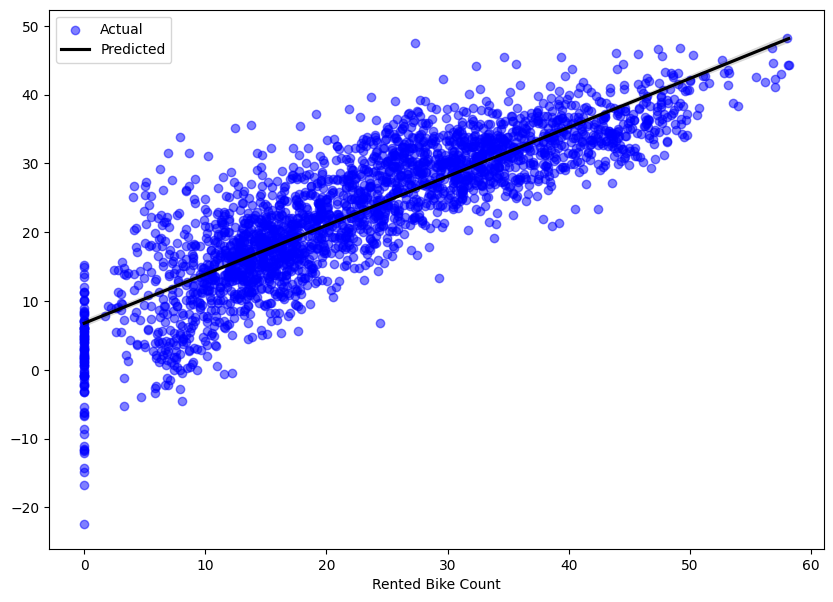

In [82]:
# Visualizing linearity between actual and predicted data
reg_scatter(y_test, ridge_y_test_pred_tuned)

##### Which hyperparameter optimization technique have you used and why?

I used Grid Search Cross Validation for hyperparameter optimization. This technique exhaustively searches through a specified hyperparameter grid to find the best combination for model performance. It's effective for fine-tuning models with a small number of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [83]:
# Putting the score of the test data in the evaluation metric
evaluation_metric_score_chart = store_scores('Ridge Regression (Grid Search CV)', mse_test, mae_test, rmse_test, r2_test)
evaluation_metric_score_chart

Model  Mean Squared Error (MSE)  \
0                  Linear Regression                 42.824751   
1                   Lasso Regression                 62.792000   
2  Lasso Regression (Grid Search CV)                 42.874921   
3                   Ridge Regression                 42.857272   
4  Ridge Regression (Grid Search CV)                 42.873072   

   Mean Absolute Error (MAE)  Root Mean Squared Error (RMSE)  R2 Score  
0                   5.150793                        6.544062  0.721190  
1                   6.311974                        7.924140  0.591193  
2                   5.150696                        6.547894  0.720863  
3                   5.148426                        6.546547  0.720978  
4                   5.149467                        6.547753  0.720875

The differences between Ridge Regression and Ridge Regression with Grid Search CV are minimal:

- Mean Squared Error (MSE) is improved from 42.86 to 42.87

- Mean Absolute Error (MAE) is within close range 5.15

- Root Mean Squared Error (RMSE) is within close range 6.55

- R2 Score is also within close range 0.72

Based on these metrics, there is no significant improvement observed after applying hyperparameter tuning using Grid Search CV for Ridge Regression. The changes are marginal and within a very close range, indicating that the default hyperparameters might already be close to optimal for this dataset and model.

### **ML Model - 4: Random Forest Regression**

In [84]:
# ML Model - 4 Implementation
rf = RandomForestRegressor()

# Fit the Algorithm
rf.fit(x_train, y_train)

# Predict on the model
rf_y_train_pred = rf.predict(x_train)
rf_y_test_pred = rf.predict(x_test)

In [85]:
# Calculating model performance score for train data
mse_train, mae_train, rmse_train, r2_train = calc_accu_score(y_train, rf_y_train_pred)

Mean Squared Error (MSE): 2.1566047298099997
Mean Absolute Error (MAE): 0.9574731060227846
Root Mean Squared Error (RMSE): 1.4685382970185012
R2 Score: 0.9861358408502076


In [86]:
# Calculating model performance score for test data
mse_test, mae_test, rmse_test, r2_test = calc_accu_score(y_test, rf_y_test_pred)

Mean Squared Error (MSE): 16.224130936257772
Mean Absolute Error (MAE): 2.640042659195415
Root Mean Squared Error (RMSE): 4.027918933675028
R2 Score: 0.894372831215246


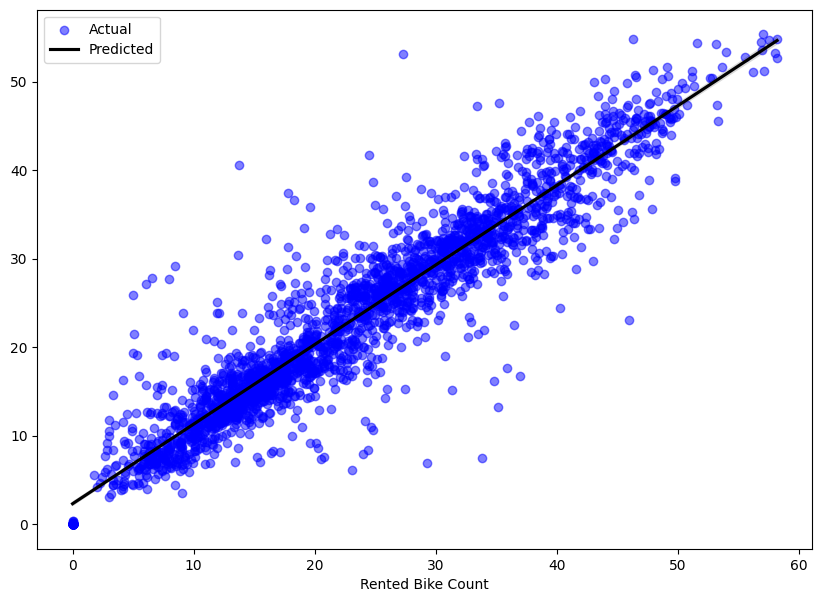

In [87]:
# Visualizing linearity between actual and predicted data
reg_scatter(y_test, rf_y_test_pred)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [88]:
# Putting the score of the test data in the evaluation metric
evaluation_metric_score_chart = store_scores('Random Forest Regression', mse_test, mae_test, rmse_test, r2_test)
evaluation_metric_score_chart

Model  Mean Squared Error (MSE)  \
0                  Linear Regression                 42.824751   
1                   Lasso Regression                 62.792000   
2  Lasso Regression (Grid Search CV)                 42.874921   
3                   Ridge Regression                 42.857272   
4  Ridge Regression (Grid Search CV)                 42.873072   
5           Random Forest Regression                 16.224131   

   Mean Absolute Error (MAE)  Root Mean Squared Error (RMSE)  R2 Score  
0                   5.150793                        6.544062  0.721190  
1                   6.311974                        7.924140  0.591193  
2                   5.150696                        6.547894  0.720863  
3                   5.148426                        6.546547  0.720978  
4                   5.149467                        6.547753  0.720875  
5                   2.640043                        4.027919  0.894373

The model used is **Random Forest Regression**, an ensemble method combining multiple decision trees for more accurate predictions.

The evaluation metrics are:

- MSE (Mean Squared Error): Approximately 16.22, suggesting larger discrepancies in prediction errors.

- MAE (Mean Absolute Error): Approximately 2.64, indicating an average prediction error of about 2.64 units.

- RMSE (Root Mean Squared Error): Approximately 4.03, showing an average error of about 4.03 units.

- R2 Score: Approximately 0.89, indicating that around 89% of the variability in the target variable is captured by the model.

The Random Forest Regression model provides an excellent fit, explaining a significant portion of the variability in the target variable, but further improvements could enhance its performance even better.

#### 2. Cross- Validation & Hyperparameter Tuning

In [89]:
# Implementation with hyperparameter optimization techniques (GridSearch CV)
# Create the model
rf_regressor = RandomForestRegressor(random_state= 42)

# Define the hyperparameters to tune
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [10, 20, 30],
              'min_samples_split': [3, 4, 5]
}
# Create the grid search object
rf_grid = GridSearchCV(estimator= rf_regressor, param_grid= param_grid, cv= 5, n_jobs= -1, scoring='neg_mean_squared_error')

# Fit the model
rf_grid.fit(x_train, y_train)

# Find the parameters for the model
best_params = rf_grid.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 200}


In [90]:
# Using the tuned hyperparameter
rf_tuned = RandomForestRegressor(**rf_grid.best_params_, random_state= 42 )

# Fitting the Algorithm
rf_tuned.fit(x_train, y_train)

# Predicting on the model
rf_y_train_pred_tuned = rf_tuned.predict(x_train)
rf_y_test_pred_tuned = rf_tuned.predict(x_test)

In [91]:
# Calculating model performance score for train data
mse_train, mae_train, rmse_train, r2_train = calc_accu_score(y_train, rf_y_train_pred_tuned)

Mean Squared Error (MSE): 3.914905348682614
Mean Absolute Error (MAE): 1.3077421621253378
Root Mean Squared Error (RMSE): 1.9786119752701927
R2 Score: 0.9748322582899596


In [92]:
# Calculating model performance score for test data
mse_test, mae_test, rmse_test, r2_test = calc_accu_score(y_test, rf_y_test_pred_tuned)

Mean Squared Error (MSE): 16.14256600544861
Mean Absolute Error (MAE): 2.633877917730992
Root Mean Squared Error (RMSE): 4.017781229167239
R2 Score: 0.8949038595179234


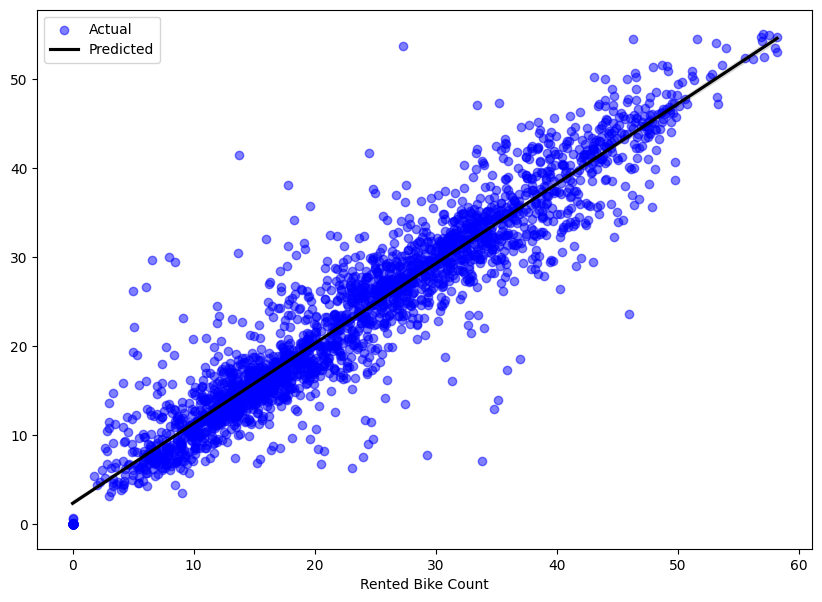

In [93]:
# Visualizing linearity between actual and predicted data
reg_scatter(y_test, rf_y_test_pred_tuned)

##### Which hyperparameter optimization technique have you used and why?

I used Grid Search Cross Validation for hyperparameter optimization. This technique exhaustively searches through a specified hyperparameter grid to find the best combination for model performance. It's effective for fine-tuning models with a small number of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [94]:
# Putting the score of the test data in the evaluation metric
evaluation_metric_score_chart = store_scores('Random Forest Regression (Grid Search CV)', mse_test, mae_test, rmse_test, r2_test)
evaluation_metric_score_chart

Model  Mean Squared Error (MSE)  \
0                          Linear Regression                 42.824751   
1                           Lasso Regression                 62.792000   
2          Lasso Regression (Grid Search CV)                 42.874921   
3                           Ridge Regression                 42.857272   
4          Ridge Regression (Grid Search CV)                 42.873072   
5                   Random Forest Regression                 16.224131   
6  Random Forest Regression (Grid Search CV)                 16.142566   

   Mean Absolute Error (MAE)  Root Mean Squared Error (RMSE)  R2 Score  
0                   5.150793                        6.544062  0.721190  
1                   6.311974                        7.924140  0.591193  
2                   5.150696                        6.547894  0.720863  
3                   5.148426                        6.546547  0.720978  
4                   5.149467                        6.547753  0.720875  
5                   2.640043                        4.027919  0.894373  
6                   2.633878                        4.017781  0.894904

The differences between Random Forest Regression and Random Forest Regression with Grid Search CV are minimal:

- Mean Squared Error (MSE) improved from 16.22 to 16.14

- Mean Absolute Error (MAE) showed a minimal improvement from 2.64 to 2.63

- Root Mean Squared Error (RMSE) also improved minimally from 4.03 to 4.02

- R2 Score demonstrated a slight improvement but remained in the close range of  0.895

These improvements suggest that the hyperparameter tuning via Grid Search CV has resulted in a slightly better-performing Random Forest Regression model compared to the default configuration.

### **ML Model - 5: Gradient Boosting Regression**

In [95]:
# ML Model - 5 Implementation
gbr = GradientBoostingRegressor()

# Fit the Algorithm
gbr.fit(x_train, y_train)

# Predict on the model
gbr_y_train_pred = gbr.predict(x_train)
gbr_y_test_pred = gbr.predict(x_test)

In [96]:
# Calculating model performance score for train data
mse_train, mae_train, rmse_train, r2_train = calc_accu_score(y_train, gbr_y_train_pred)

Mean Squared Error (MSE): 24.966867314644404
Mean Absolute Error (MAE): 3.8321054372597683
Root Mean Squared Error (RMSE): 4.996685632961554
R2 Score: 0.839495565813547


In [97]:
# Calculating model performance score for test data
mse_test, mae_test, rmse_test, r2_test = calc_accu_score(y_test, gbr_y_test_pred)

Mean Squared Error (MSE): 27.287400017518145
Mean Absolute Error (MAE): 4.05427444900078
Root Mean Squared Error (RMSE): 5.223734298135592
R2 Score: 0.822345442189071


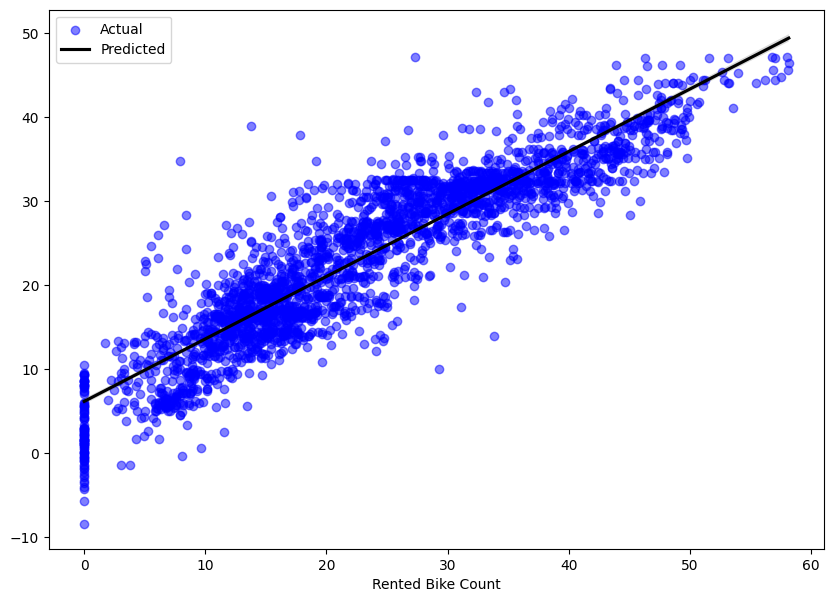

In [98]:
# Visualizing linearity between actual and predicted data
reg_scatter(y_test, gbr_y_test_pred)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [99]:
# Putting the score of the test data in the evaluation metric
evaluation_metric_score_chart = store_scores('Gradient Boosting Regression', mse_test, mae_test, rmse_test, r2_test)
evaluation_metric_score_chart

Model  Mean Squared Error (MSE)  \
0                          Linear Regression                 42.824751   
1                           Lasso Regression                 62.792000   
2          Lasso Regression (Grid Search CV)                 42.874921   
3                           Ridge Regression                 42.857272   
4          Ridge Regression (Grid Search CV)                 42.873072   
5                   Random Forest Regression                 16.224131   
6  Random Forest Regression (Grid Search CV)                 16.142566   
7               Gradient Boosting Regression                 27.287400   

   Mean Absolute Error (MAE)  Root Mean Squared Error (RMSE)  R2 Score  
0                   5.150793                        6.544062  0.721190  
1                   6.311974                        7.924140  0.591193  
2                   5.150696                        6.547894  0.720863  
3                   5.148426                        6.546547  0.720978  
4                   5.149467                        6.547753  0.720875  
5                   2.640043                        4.027919  0.894373  
6                   2.633878                        4.017781  0.894904  
7                   4.054274                        5.223734  0.822345

The model used is **Gradient Boosting Regression**, an ensemble learning technique. It combines multiple weak learners to create a strong predictive model, where each model tries to minimize the residual errors of the previous model.

The evaluation metrics are:

- MSE (Mean Squared Error): Approximately 27.29, suggesting larger discrepancies in prediction errors.

- MAE (Mean Absolute Error): Approximately 4.05, indicating an average prediction error of about 4.05 units.

- RMSE (Root Mean Squared Error): Approximately 5.22, showing an average error of about 5.22 units.

- R2 Score: Approximately 0.82, indicating that around 82% of the variability in the target variable is captured by the model.

The Gradient Boosting Regression model provides an excellent fit, explaining a significant portion of the variability in the target variable, but further improvements could enhance its performance even better.

#### 2. Cross- Validation & Hyperparameter Tuning

In [100]:
# Implementation with hyperparameter optimization techniques (GridSearch CV)
# Create the model
gbr_regressor = GradientBoostingRegressor(random_state= 42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [20, 30, 40],
    'min_samples_split': [10, 12, 14]
}
# Create the grid search object
gbr_grid = GridSearchCV(estimator= gbr_regressor, param_grid= param_grid, cv= 5, n_jobs= -1, scoring='neg_mean_squared_error')

# Fit the model
gbr_grid.fit(x_train, y_train)

# Find the parameters for the model
best_params = gbr_grid.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'max_depth': 20, 'min_samples_split': 14, 'n_estimators': 100}


In [101]:
# Using the tuned hyperparameter
gbr_tuned = RandomForestRegressor(**gbr_grid.best_params_, random_state= 42)

# Fitting the Algorithm
gbr_tuned.fit(x_train, y_train)

# Predicting on the model
gbr_y_train_pred_tuned = gbr_tuned.predict(x_train)
gbr_y_test_pred_tuned = gbr_tuned.predict(x_test)

In [102]:
# Calculating model performance score for train data
mse_train, mae_train, rmse_train, r2_train = calc_accu_score(y_train, gbr_y_train_pred_tuned)

Mean Squared Error (MSE): 11.5267892240818
Mean Absolute Error (MAE): 2.350128714156751
Root Mean Squared Error (RMSE): 3.395112549545567
R2 Score: 0.9258977604566124


In [103]:
# Calculating model performance score for test data
mse_test, mae_test, rmse_test, r2_test = calc_accu_score(y_test, gbr_y_test_pred_tuned)

Mean Squared Error (MSE): 18.568602654966483
Mean Absolute Error (MAE): 2.939682236155736
Root Mean Squared Error (RMSE): 4.309130150618159
R2 Score: 0.8791091532459256


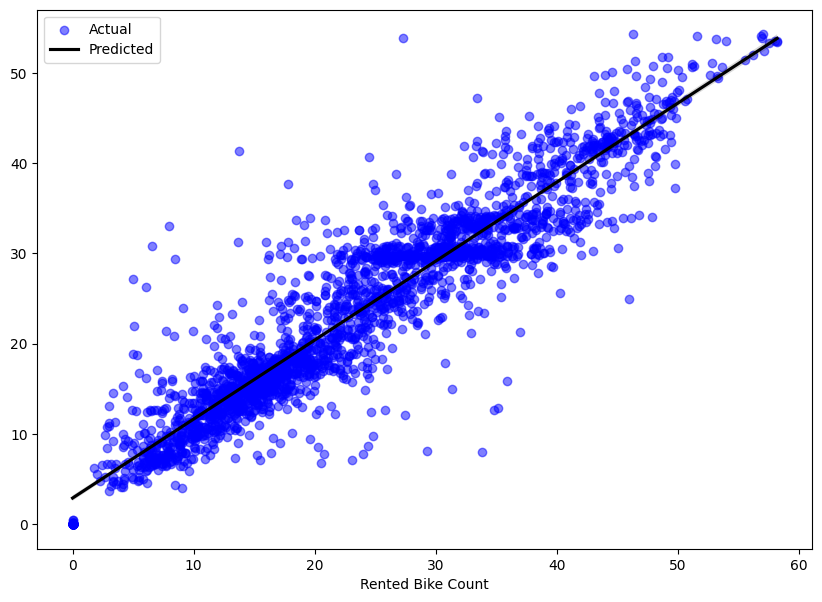

In [104]:
# Visualizing linearity between actual and predicted data
reg_scatter(y_test, gbr_y_test_pred_tuned)

##### Which hyperparameter optimization technique have you used and why?

I used Grid Search Cross Validation for hyperparameter optimization. This technique exhaustively searches through a specified hyperparameter grid to find the best combination for model performance. It's effective for fine-tuning models with a small number of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [105]:
# Putting the score of the test data in the evaluation metric
evaluation_metric_score_chart = store_scores('Gradient Boosting Regression (Grid Search CV)', mse_test, mae_test, rmse_test, r2_test)
evaluation_metric_score_chart

Model  Mean Squared Error (MSE)  \
0                              Linear Regression                 42.824751   
1                               Lasso Regression                 62.792000   
2              Lasso Regression (Grid Search CV)                 42.874921   
3                               Ridge Regression                 42.857272   
4              Ridge Regression (Grid Search CV)                 42.873072   
5                       Random Forest Regression                 16.224131   
6      Random Forest Regression (Grid Search CV)                 16.142566   
7                   Gradient Boosting Regression                 27.287400   
8  Gradient Boosting Regression (Grid Search CV)                 18.568603   

   Mean Absolute Error (MAE)  Root Mean Squared Error (RMSE)  R2 Score  
0                   5.150793                        6.544062  0.721190  
1                   6.311974                        7.924140  0.591193  
2                   5.150696                        6.547894  0.720863  
3                   5.148426                        6.546547  0.720978  
4                   5.149467                        6.547753  0.720875  
5                   2.640043                        4.027919  0.894373  
6                   2.633878                        4.017781  0.894904  
7                   4.054274                        5.223734  0.822345  
8                   2.939682                        4.309130  0.879109

Yes, there is an improvement in the model performance after applying Grid Search Cross Validation for hyperparameter tuning:

- Mean Squared Error (MSE) improved from 27.29 to 18.57

- Mean Absolute Error (MAE) improved from 4.05 to 2.94

- Root Mean Squared Error (RMSE) improved from 5.22 to 4.31

- R2 Score improved from 0.82 to approximately 0.88

These improvements indicate that the model's predictive accuracy has been enhanced after tuning the hyperparameters using Grid Search Cross Validation.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**1. Mean Squared Error (MSE)**

MSE: Approximately 18.57

- **Indication:** Measures the average squared difference between predicted and actual values. A lower MSE indicates smaller prediction errors.

- **Business Impact:** A lower MSE suggests relatively smaller prediction errors, leading to more accurate forecasts in bike rental demand. This can optimize resource allocation and improve operational efficiency.

**2. Mean Absolute Error (MAE)**

MAE: Approximately 2.94

- **Indication:** Represents the average magnitude of errors in predictions, irrespective of direction.

- **Business Impact:** An MAE of 2.94 means that, on average, predictions deviate by about 2.94 units. This level of accuracy indicates more precise forecasts, benefiting operational planning and customer satisfaction.

**3.Root Mean Squared Error (RMSE)**

RMSE: Approximately 4.31

- **Indication:** RMSE is the square root of MSE, giving a sense of the average magnitude of errors with higher sensitivity to large errors.

- **Business Impact:** An RMSE of 4.31 suggests that most predictions are relatively close to the actual values, with occasional larger errors. This helps in understanding the typical prediction error and its implications for resource management.

**4. R-squared (R2 Score)**

R2 Score: Approximately 0.88

- **Indication:** Measures the proportion of variance in the target variable explained by the model. A higher R2 score indicates better model fit.

- **Business Impact:** An R2 score of 0.88 indicates that 88% of the variability in bike rentals is explained by the model. This demonstrates a high level of predictive power, enabling informed decision-making for operational and strategic purposes.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

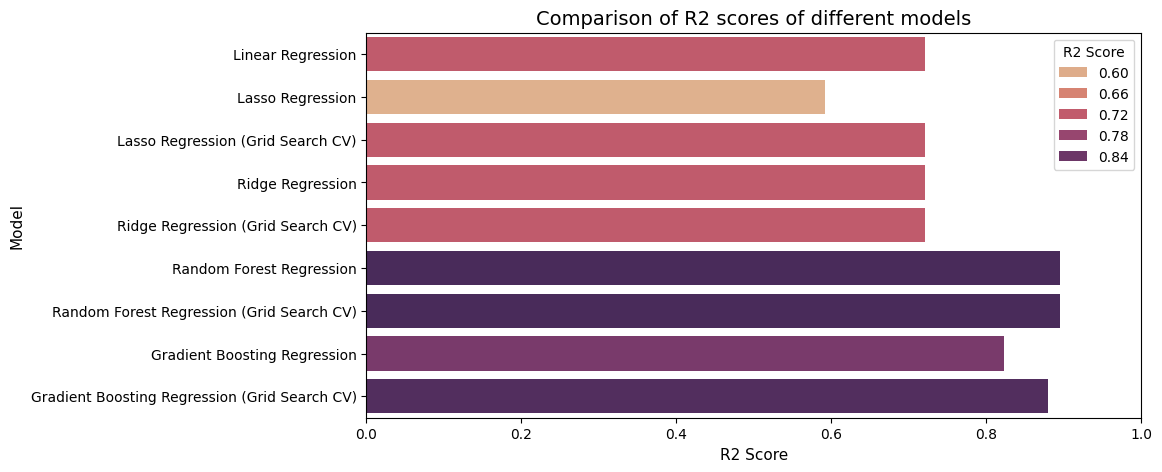

In [106]:
plt.figure(figsize = (10, 5))

sns.barplot(data = score_df, x= "R2 Score", y = "Model", hue = "R2 Score",palette= "flare")
plt.title('Comparison of R2 scores of different models', size= 14)
plt.xlabel("R2 Score", size= 11)
plt.ylabel("Model", size= 11)
plt.xlim(0, 1)

plt.show()

Based on the above evaluation metrics, Random Forest Regression with Grid Search CV has the lowest Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and the highest R2 Score among all the models suggesting a strong predictive power.

Therefore, based on these combined factors I chose the **Random Forest Regression** **with** **Grid Search CV** as the final prediction model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [107]:
# Calculating feature importance for Random forest regression(Grid search CV) model
feature_importances = rf_grid.best_estimator_.feature_importances_
feature_importances

array([0.18783644, 0.00951209, 0.02362875, 0.00402667, 0.01595561,
       0.00124782, 0.00556936, 0.1584799 , 0.0721328 , 0.02334293,
       0.00345732, 0.01199139, 0.02406534, 0.03635123, 0.04479581,
       0.04070772, 0.0191456 , 0.00445561, 0.01075477, 0.00131061,
       0.00297934, 0.00127623, 0.00036069, 0.00086945, 0.00088509,
       0.00208226, 0.00453151, 0.0109819 , 0.03747031, 0.01541235,
       0.00847199, 0.00884055, 0.00586614, 0.00261489, 0.00124676,
       0.00092192, 0.00729502, 0.18912585])

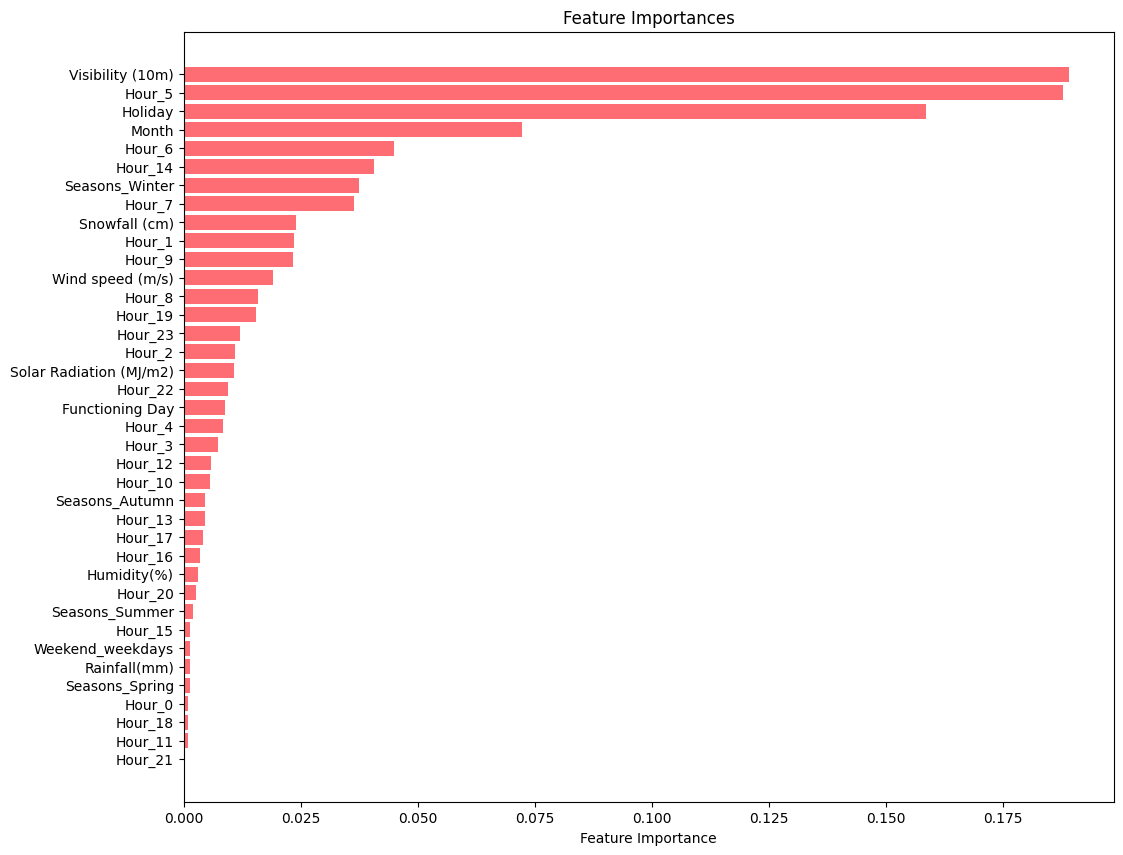

In [108]:
# Sort features and feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [features[i] for i in sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a horizontal bar chart
plt.figure(figsize= (12, 10))

plt.barh(sorted_features, sorted_importances, color='#fe6d73')
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()

plt.show()

**1. Model Used:** I used a Random Forest Regressor model with Grid Search CV for my predictions. This model is chosen for its ability to combine multiple decision trees for better accuracy and capture interactions between features effectively.

**2. Feature Importance:**

- Seasons_Winter: Indicates that winter season significantly affects bike rentals, possibly due to weather conditions.

- Humidity(%), Wind speed (m/s), Visibility (10m), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm): Weather-related features influencing bike usage, with humidity and wind speed being particularly impactful.

- Functioning Day, Holiday: Operational factors affecting rental patterns based on weekdays versus holidays.

- Month: Seasonal variation in bike rentals.

- Hour_X: Specific hours of the day showing peak rental times.

- Weekend_weekdays: Weekends and weekdays affecting rental demand.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [109]:
# Save the File
from joblib import dump

# Save the best performing model
dump(rf_grid.best_estimator_, 'best_model.joblib')

['best_model.joblib']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [110]:
from joblib import load

# Load the saved model
model = load('best_model.joblib')

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In conclusion, our comprehensive data analysis and regression model have provided valuable insights and actionable recommendations for optimizing bike-sharing operations. By exploring and understanding key features such as weather conditions, time of day and seasonal variations, we identified significant factors influencing bike rental demand.

The **Random Forest Regression** model, enhanced through hyperparameter tuning (**Grid Search CV**), achieved a robust **R² score** of **0.895**, demonstrating its high predictive accuracy of **89.5%**. This model effectively leverages critical features, highlighting their impact on rental demand and enabling better forecasting.

The analysis of feature importances revealed that variables like Hour, weather features, functioning days and seasonal changes play pivotal roles in predicting bike rentals. These insights can guide strategic decisions, such as optimizing bike availability during peak demand periods and enhancing operational efficiency.

This project underscores the potential of machine learning in transforming urban mobility solutions, providing stakeholders with data-driven strategies to enhance decision-making, resource allocation, improved service that promotes user satisfaction and operational effectiveness.

Ultimately, leveraging these insights will empower bike-sharing services to adapt and thrive in a competitive landscape, ensuring sustainable growth and the evolving needs of their customers.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***